In [13]:
from google.colab import drive

In [17]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [21]:
# Loading Dataset
df = pd.read_csv("/content/laptop_details (1).csv")

In [22]:
# Printing Top 5 Rows
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [26]:
# Printing Last 5 Rows
df.tail()

,Product,Rating,MRP,Feature
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...
719,Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 G...,4.2,"₹50,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [27]:
# Printing Random 10 Rows

df.sample(10)

,Product,Rating,MRP,Feature
491,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,4.2,"₹35,590",AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...
561,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,"₹1,96,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
312,ASUS Core i5 10th Gen - (8 GB/256 GB SSD/Windo...,4.7,"₹44,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
332,acer Nitro 5 Ryzen 5 Hexa Core AMD R5-5600H - ...,4.3,"₹62,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
367,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,"₹1,96,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
434,Lenovo IdeaPad 1 Celeron Dual Core 4th Gen - (...,3.9,"₹26,490",Intel Celeron Dual Core Processor (4th Gen)4 G...
325,APPLE 2021 Macbook Pro M1 Pro - (16 GB/512 GB ...,4.8,"₹2,22,990",Apple M1 Pro Processor16 GB Unified Memory RAM...
504,HP Pavilion Ryzen 5 Hexa Core 5625U - (8 GB/51...,4.2,"₹54,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
483,DELL Inspiron Ryzen 3 Dual Core 3250U - (8 GB/...,4.2,"₹41,600",AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...
206,Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...,4.2,"₹38,705",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...


# Exploratory Data Analysis

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate datasets and summarize their main characteristics, often employing data visualization methods.


In [28]:
# Printing Total Number of Rows and Columns

df.shape

(720, 4)

In [29]:
# Printing Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [30]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,581.0,4.32117,0.282872,3.0,4.2,4.3,4.5,5.0


In [32]:
df.isna().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [33]:
# Checking Duplicated Values

df.duplicated().sum()

297

In [34]:
duplicates = df.duplicated(subset=['Rating'])
# print the rows that are duplicates
print(df[duplicates])

                                               Product  Rating        MRP  \
1    Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...     4.2    ₹39,990   
4    ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...     4.4    ₹49,990   
5    HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...     4.2    ₹36,990   
6    DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...     4.3    ₹38,990   
8    realme Book (Slim) Core i3 11th Gen - (8 GB/25...     4.4    ₹46,990   
..                                                 ...     ...        ...   
714  HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...     4.6    ₹90,000   
715  ASUS Chromebook Flip Touch Celeron Dual Core -...     4.0    ₹23,490   
716  Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...     4.5    ₹73,490   
717  ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...     NaN  ₹1,94,990   
719  Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 G...     4.2    ₹50,990   

                                               Feature  
1    Intel Core i3

In [35]:
duplicate = df[df.duplicated('Product')]
duplicate

,Product,Rating,MRP,Feature
25,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,"₹39,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
26,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
27,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,"₹1,96,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...
29,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,"₹46,990",Stylish & Portable Thin and Light Laptop14 inc...
30,Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...,4.2,"₹38,705",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...
...,...,...,...,...
708,ASUS VivoBook 15 Core i5 10th Gen - (8 GB/1 TB...,3.9,"₹44,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
710,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,4.2,"₹35,590",AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...
711,ASUS ROG Strix G15 Advantage Edition with 90Wh...,4.9,"₹1,50,990",AMD Ryzen 9 Octa Core Processor16 GB DDR4 RAMW...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...


In [36]:
df = df.drop_duplicates()

In [37]:
df.isna().sum()

Product     0
Rating     84
MRP         0
Feature     0
dtype: int64

**Findings**

- Data have 720 Rows and 4 Columns
- MRP need treatment because it contain strings 
- Likewise we dont use Rating Columns so we dont need to take care of that column
<!-- - We have limited amount of data so we don't to need drop the data in duplicated values or any others -->

# Data Preprocessing

Data preprocessing is the process of transforming raw data into a format that can be easily understood and analyzed by a computer. This involves cleaning and transforming the data, integrating data from different sources, reducing the dataset size by eliminating irrelevant data, and discretizing continuous data. Data preprocessing is essential to ensure that the data is accurate, consistent, and in a format suitable for analysis.

**Treating MRP Column**

In [38]:
# MRP Column

df.MRP.head()

0    ₹36,990
1    ₹39,990
2    ₹32,990
3    ₹49,990
4    ₹49,990
Name: MRP, dtype: object

In [39]:
# Removing Rupee Symbol

df['MRP'] = df['MRP'].str.replace('₹','')

In [40]:
# Removing Coma and Convert into Integer

df['MRP'] = df['MRP'].str.replace(',','').astype('float32')

In [41]:
df.MRP

0       36990.0
1       39990.0
2       32990.0
3       49990.0
4       49990.0
         ...   
713     76590.0
714     90000.0
715     23490.0
718    125990.0
719     50990.0
Name: MRP, Length: 423, dtype: float32

In [42]:
print("Minimum Value : ", df.MRP.min())
print("Maximum Value : ", df.MRP.max())
print("Mean Value : ",    df.MRP.mean())
print("Median Value : ",  df.MRP.median())

Minimum Value :  14990.0
Maximum Value :  434830.0
Mean Value :  81546.266
Median Value :  61497.0


In [43]:
print("25% Values : ", df.MRP.quantile(0.25))
print("75% Values : ", df.MRP.quantile(0.75))

25% Values :  41745.0
75% Values :  94990.0


**Findings**

- Minimum Values of MRP Column is 14990
- Maximum Values of MRP Column is 434830
- Mean Values of MRP Column is 81605
- Median Values of MRP Column is 59990
- 25% Values of MRP Column is 38996
- 75% Values of MRP Column is 95240

#### Which means data have to many outlier

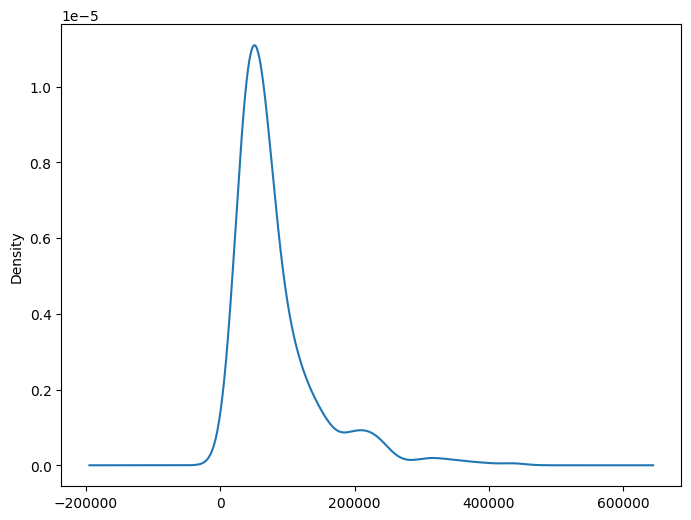

In [44]:
# Visualizing Density PLot in MRP Column for checking the Distribution 

df.MRP.plot(kind='kde', figsize=(8,6))
plt.show()

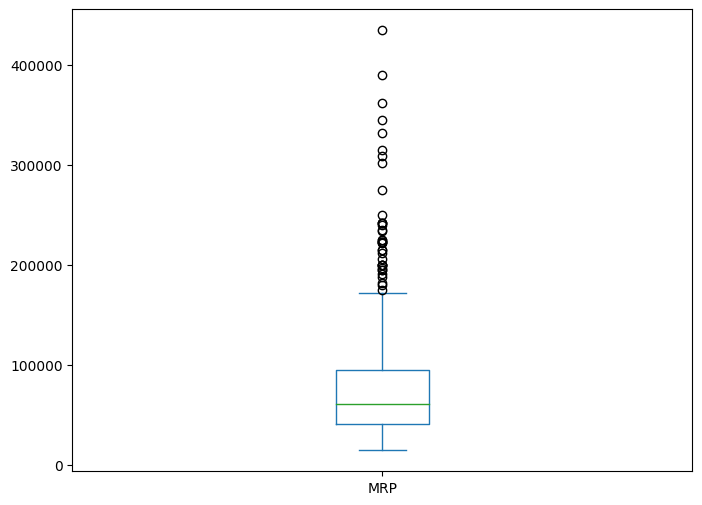

In [45]:
# Visualizing BoxPLot in MRP Column for checking the Outlier 

df.MRP.plot(kind='box', figsize=(8,6))
plt.show()

**Findings**

- Like i previously mension we have too many Outliers
- Instead of removing values we have to use Data transformation to handle Outliers

### Data transformation

Data transformation is the process of converting data from one format or scale to another to make it suitable for analysis. It can involve changing the distribution of data, scaling or normalizing values, converting categorical data to numerical data, and more.

**Log transformation** converting data to a logarithmic scale to reduce the magnitude of extreme values and make the distribution more symmetric.

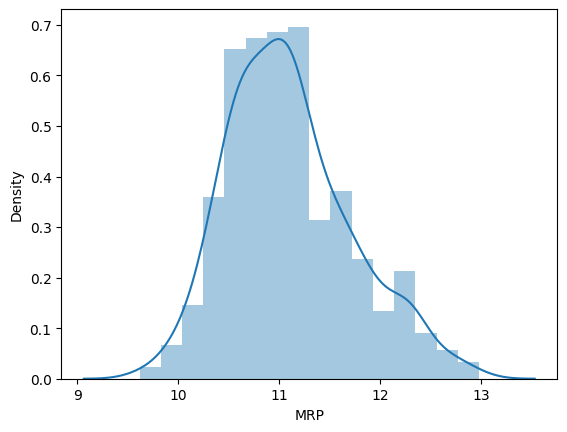

In [46]:
log = df.MRP.apply(np.log1p)
sns.distplot(log)
plt.show()

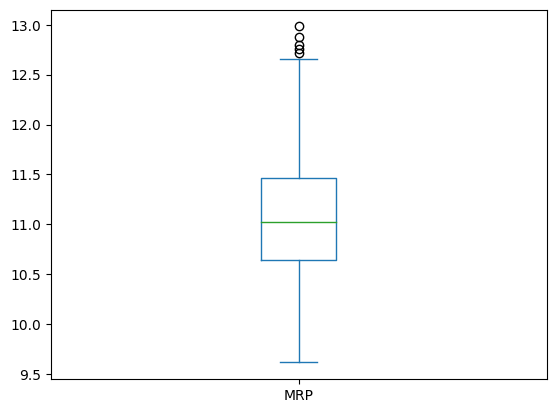

In [47]:
log.plot(kind='box')
plt.show()

**Reciprocal** transformation involves taking the reciprocal of each value in a dataset to reduce the effect of extreme values and make the distribution of the data more symmetric. It is particularly useful when the data has a positive skew, but has limitations and should be used with caution.

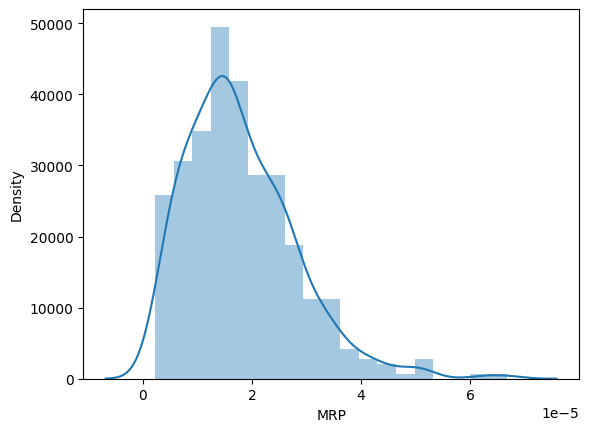

In [48]:
reci = df.MRP.apply(np.reciprocal)
sns.distplot(reci)
plt.show()

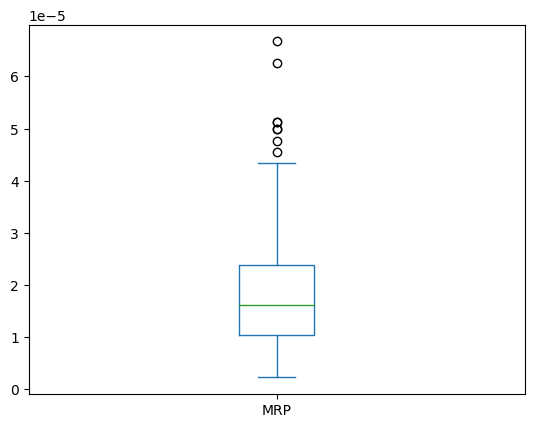

In [49]:
reci.plot(kind='box')
plt.show()

**Square root transformation** involves taking the square root of each value in a dataset to reduce the effect of extreme values and make the distribution of the data more symmetric. It is often used when the data has a positive skew, but its effectiveness depends on the specific dataset and analysis goals.

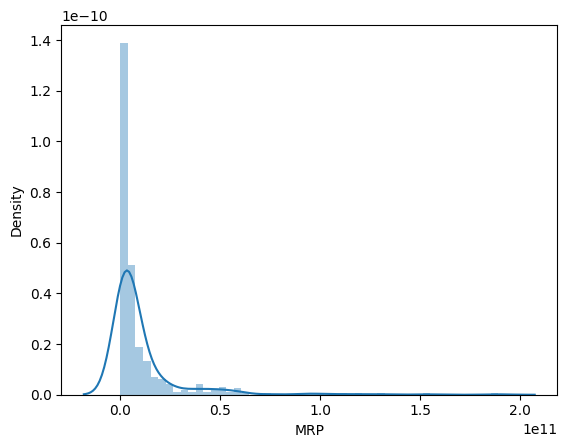

In [50]:
squ = df.MRP.apply(np.square)
sns.distplot(squ)
plt.show()

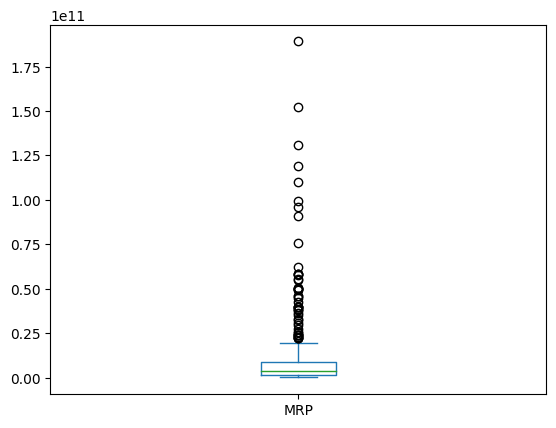

In [51]:
squ.plot(kind='box')
plt.show()

**Power transformation** - raising data to a power to adjust the distribution and reduce the impact of outliers.

<Axes: ylabel='Density'>

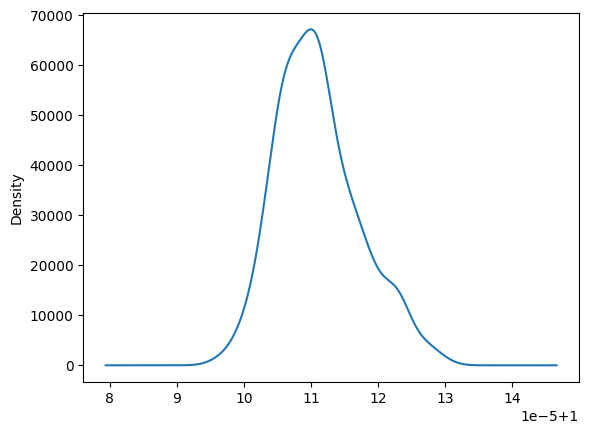

In [52]:
power = 0.00001

# apply the power transformation
transformed_data = np.power(df.MRP, power)
transformed_data.plot(kind='kde')

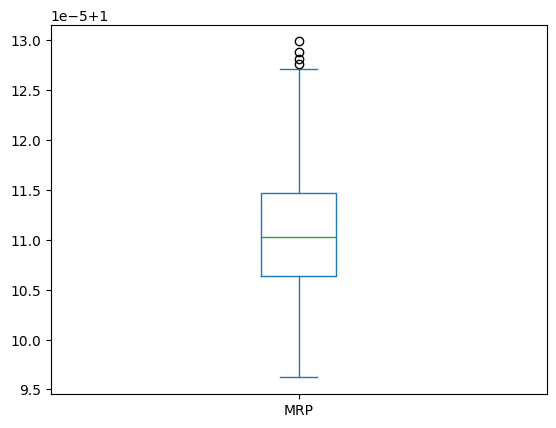

In [53]:
transformed_data.plot(kind='box')
plt.show()

**Findings**

- After applying few data transformation log and power will perform better
- I did some parameter tuning in power transformation to make it better
- Conclusion i choose Log Transformation for my MRP Column

In [54]:
df['MRP'] = log

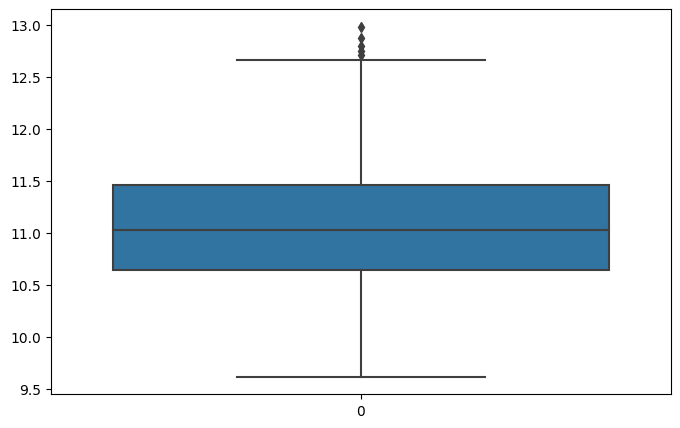

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(df.MRP)
plt.show()

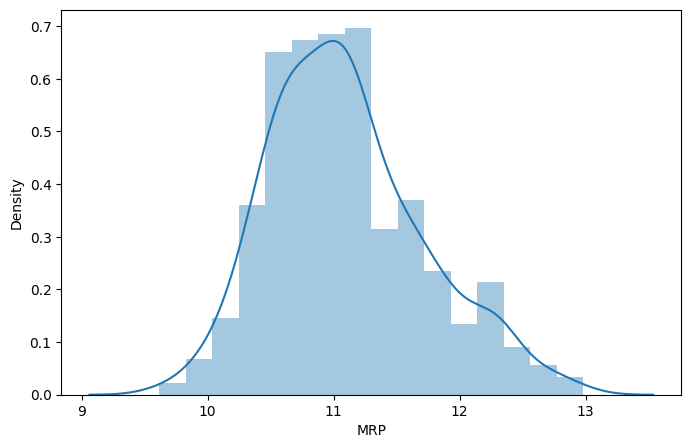

In [56]:
plt.figure(figsize=(8,5))
sns.distplot(df.MRP)
plt.show()

**Outlier**

An outlier is an observation or data point that is significantly different from other observations in a dataset. In other words, an outlier is a value that is either much larger or much smaller than the other values in the dataset.

Outliers can occur for various reasons, such as measurement errors, data entry mistakes, or they may represent true extreme values in the population. However, outliers can have a significant impact on statistical analyses, as they can distort the results, affecting measures of central tendency, variability, and correlation.

Therefore, it is important to identify and handle outliers appropriately in data analysis. Some common techniques for handling outliers include capping or trimming outliers, imputing missing values, or using robust statistical methods that are less sensitive to outliers. Ultimately, the choice of technique will depend on the nature of the data and the objectives of the analysis.

In [57]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


**Capping Outlier**

Capping outliers means setting a limit to extreme values in a dataset. It helps to reduce the impact of outliers on the analysis and make the dataset more representative of the general population. However, caution should be exercised as it may mask important information in the data and may not be appropriate in all situations. Various methods are used to cap outliers, depending on the data and objectives of the analysis.

In [58]:
# Finding the IQR

percentile25 = df.MRP.quantile(0.25)
percentile75 = df.MRP.quantile(0.75)

In [59]:
percentile25

10.639352798461914

In [60]:
percentile75

11.46153736114502

In [61]:
iqr = percentile75 - percentile25

In [62]:
iqr

0.8221845626831055

In [63]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [64]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 12.694814205169678
Lower limit 9.406075954437256


In [65]:
# Finding Outlier

df[df['MRP'] > upper_limit]

,Product,Rating,MRP,Feature
464,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,NaN,12.873878,Intel Core i9 Processor (12th Gen)32 GB DDR5 R...
602,ASUS ROG Zephyrus M16 (2022) with 90Whr Batter...,NaN,12.712863,Intel Core i9 Processor (12th Gen)32 GB DDR5 R...
614,ASUS ROG Zephyrus Duo 16 (2022) with 90Whr Bat...,NaN,12.799375,AMD Ryzen 9 Octa Core Processor32 GB DDR5 RAM6...
625,DELL Allienware Core i9 11th Gen - (32 GB/1 TB...,NaN,12.982713,Intel Core i9 Processor (11th Gen)32 GB DDR4 R...
628,ALIENWARE Core i9 10th Gen - (32 GB/1 TB SSD/W...,4.6,12.752433,NVIDIA GeForce RTX 2080 with Max-Q15.6 inch Fu...


In [66]:
df[df['MRP'] < lower_limit]

,Product,Rating,MRP,Feature


In [67]:
new_df_cap = df.copy()

new_df_cap['MRP'] = np.where(
    new_df_cap['MRP'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['MRP'] < lower_limit,
        lower_limit,
        new_df_cap['MRP']
    )
)

In [68]:
new_df_cap.shape

(423, 4)

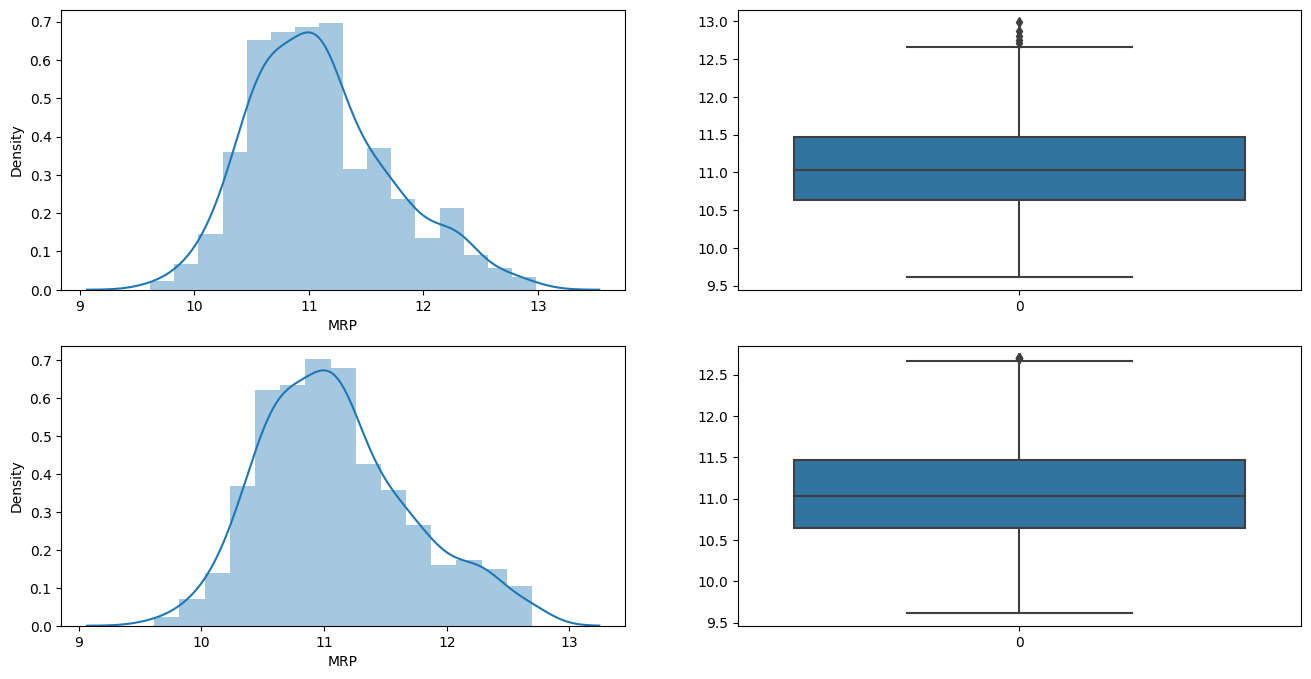

In [69]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['MRP'])

plt.subplot(2,2,2)
sns.boxplot(df['MRP'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['MRP'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['MRP'])

plt.show()

<Axes: >

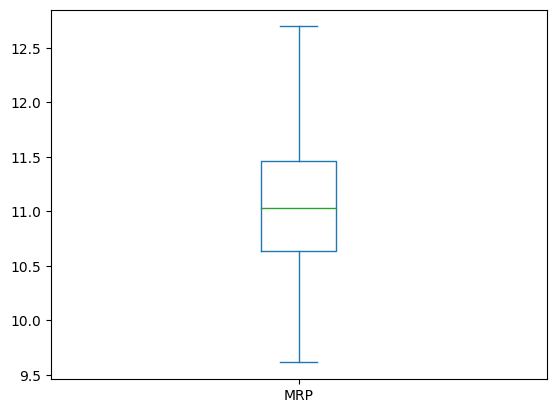

In [70]:
new_df_cap.MRP.plot(kind='box')

### Trimming

Trimming outliers means removing extreme values from a dataset by setting a threshold value and deleting any values that exceed this limit. It helps to remove the impact of outliers on the analysis and make the dataset more representative of the general population. However, caution should be exercised as it may also mask important information in the data and may not be appropriate in all situations. Various methods are used to trim outliers, depending on the data and objectives of the analysis.

In [71]:
new_df = df[df['MRP'] < upper_limit]

In [72]:
new_df.shape

(418, 4)

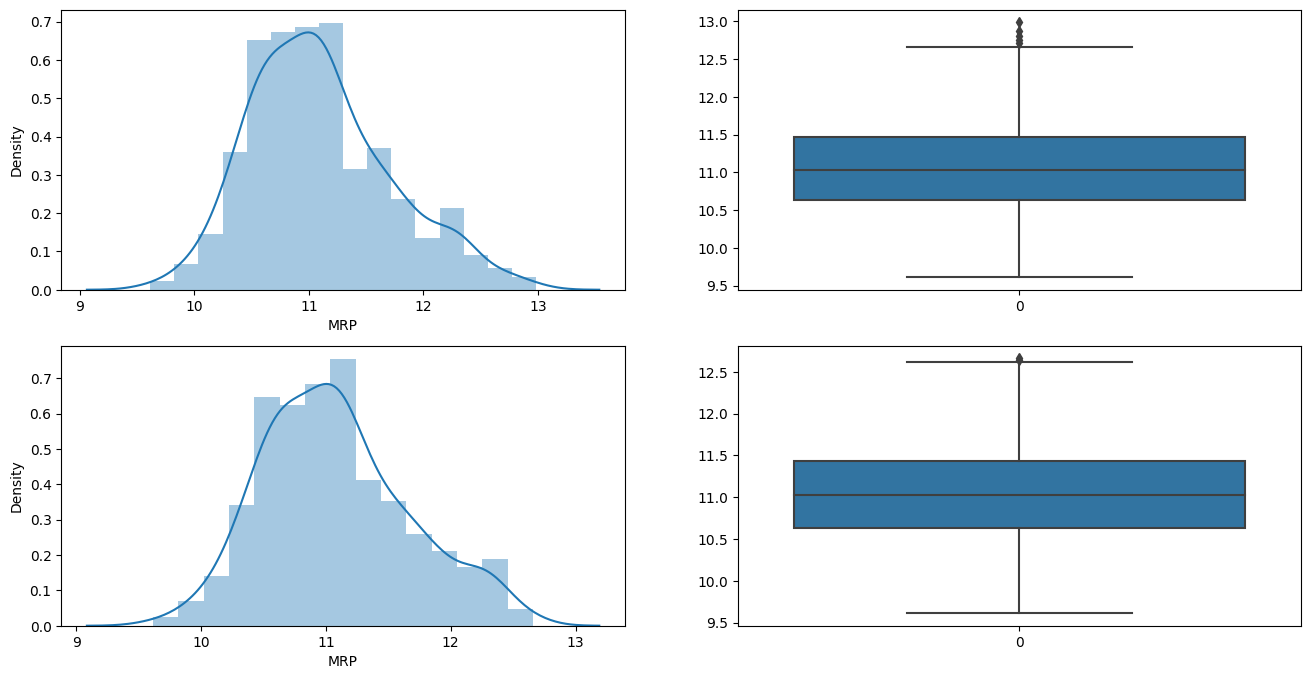

In [231]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['MRP'])

plt.subplot(2,2,2)
sns.boxplot(df['MRP'])

plt.subplot(2,2,3)
sns.distplot(new_df['MRP'])

plt.subplot(2,2,4)
sns.boxplot(new_df['MRP'])

plt.show()

**Finding**

Since Trying both Capping and Trimming Technique but didn't effect on distribtion so I decided so use capping instead trimming because of less data.

**Applying Capping**

In [73]:
df['MRP'] = np.where(
    df['MRP'] > upper_limit,
    upper_limit,
    np.where(
        df['MRP'] < lower_limit,
        lower_limit,
        df['MRP']
    )
)

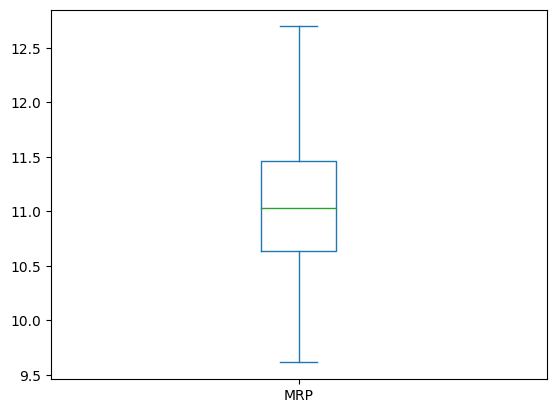

In [74]:
df.MRP.plot(kind='box')
plt.show()

# Feature Engineering

Feature engineering is the process of transforming raw data into useful features that can be used to train machine learning models. It involves selecting and extracting relevant data features, as well as transforming and scaling them to improve model performance. Feature engineering requires domain knowledge, creativity, and analytical skills and involves techniques such as one-hot encoding, scaling, feature selection, and feature extraction. The goal is to identify and select relevant features while avoiding overfitting the model to the training data. It is a critical component of the machine learning pipeline to develop accurate and robust predictive models.


In [75]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [121]:
df.Product[5]

'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop'

In [77]:
df.Feature[463]

'Intel Core i3 Processor (10th Gen)4 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD39.62 cm (15.6 inch) DisplaySplendid, Tru2Life, My Asus1 Year Onsite Warranty'

**Findings**

- In Product Column we can fetch Brand Name and Ram Size 
- But in Feature we can fetch more Data regarding our project
 
 **My Observation I'm thinking to Extract all this data mention below**

 1. -  Brand Name  
 2. -  RAM Type    
 3. -  RAM Size    
 4. -  OS
 5. -  Disk Type   
 6. -  Disk Size   
 7. - Processor
 8. -  GPU 
 9. -  Warranty
 10. - Screen Size

**Brand Name**

A laptop brand name refers to the name of the company that manufactures and sells laptops. There are numerous laptop brands in the market, each with its unique features, design, and price range. Popular laptop brands include Apple, Dell, HP, Lenovo, Acer, ASUS, MSI, Razer, Samsung, and LG. Each of these brands has its strengths and weaknesses, and consumers often choose a laptop brand based on their specific needs and preferences.

In [78]:
# Splitting data into Three parts to that i can fetch brand name and others 

temp1 = df['Product'].str.split('GB', n=3, expand=True)

In [79]:
# Printing temp1 dataframe

temp1

,0,1,2,3
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8,/256,SSD/Windows 11 Home) 14ITL05 Thin and Light L...,None
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8,/512,SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN ...,None
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8,/512,SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-...,None
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8,/512,SSD/Windows 10/4,Graphics/NVIDIA GeForce ...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8,/512,SSD/Windows 11 Home/4,Graphics/NVIDIA GeForce G...
...,...,...,...,...
713,DELL Core i5 12th Gen - (16,/512,SSD/Windows 11 Home) Inspiron 5320 Thin and L...,None
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (16,/512,SSD/Windows 10 Home/4,Graphics/NVIDIA Ge...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,/64,EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...,None
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,/512,SSD/Windows 11 Home) UP5...,None


In [80]:
temp1[0][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 '

In [81]:
# Printing temp1 first column

temp1[0]

0                Lenovo IdeaPad 3 Core i3 11th Gen - (8 
1                Lenovo IdeaPad 3 Core i3 11th Gen - (8 
2         ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 
3       HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 
4             ASUS TUF Gaming F15 Core i5 10th Gen - (8 
                             ...                        
713                         DELL Core i5 12th Gen - (16 
714    HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (16 
715    ASUS Chromebook Flip Touch Celeron Dual Core -...
718    ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...
719        Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 
Name: 0, Length: 423, dtype: object

In [82]:
# Printing temp1 second column

temp1[1]

0               /256 
1               /512 
2               /512 
3               /512 
4               /512 
            ...      
713             /512 
714             /512 
715              /64 
718             /512 
719    /1 TB HDD/256 
Name: 1, Length: 423, dtype: object

In [83]:
# Printing temp1 third column

temp1[2]

0       SSD/Windows 11 Home) 14ITL05 Thin and Light L...
1       SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN ...
2       SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-...
3                                      SSD/Windows 10/4 
4                                 SSD/Windows 11 Home/4 
                             ...                        
713     SSD/Windows 11 Home) Inspiron 5320 Thin and L...
714                               SSD/Windows 10 Home/4 
715       EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...
718                          SSD/Windows 11 Home) UP5...
719                  SSD/Windows 10 Home) 15IIL05 Laptop
Name: 2, Length: 423, dtype: object

**Findings**

- I think temp1 first column well help me to extact Laptop Brand Name
- And Fetching Hard Disk size into temp second column

In [84]:
# temp1 first column into temp1s variable

temp1s = temp1[0]

In [85]:
# Converting Series into Dataframe

temp1s = pd.DataFrame(temp1s)
temp1s

,0
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8
...,...
713,DELL Core i5 12th Gen - (16
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (16
715,ASUS Chromebook Flip Touch Celeron Dual Core -...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...


In [86]:
# Fetching Laptop Brand Name Using Split function and Indexing 

brand = temp1s[0].str.split().str[0]
brand.value_counts()

ASUS         136
Lenovo        62
HP            57
DELL          56
acer          34
MSI           29
APPLE         19
Infinix       14
realme         4
ALIENWARE      3
RedmiBook      2
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: 0, dtype: int64

In [87]:
# Adding brand column into main DataFrame

df['Brand Name'] = brand
df.head()

,Product,Rating,MRP,Feature,Brand Name
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [88]:
df['Brand Name'].value_counts()

ASUS         136
Lenovo        62
HP            57
DELL          56
acer          34
MSI           29
APPLE         19
Infinix       14
realme         4
ALIENWARE      3
RedmiBook      2
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand Name, dtype: int64

In [122]:
# To prevent overfitting less brand values store into Others Variable

df['Brand Name'] = df['Brand Name'].str.replace('realme','Others')
df['Brand Name'] = df['Brand Name'].str.replace('SAMSUNG','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Ultimus','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Vaio','Others')
df['Brand Name'] = df['Brand Name'].str.replace('GIGABYTE','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Nokia','Others')
df['Brand Name'] = df['Brand Name'].str.replace('ALIENWARE','DELL')

In [123]:
df['Brand Name'].value_counts()

ASUS         136
Lenovo        62
DELL          59
HP            57
acer          34
MSI           29
APPLE         19
Infinix       14
Others        11
RedmiBook      2
Name: Brand Name, dtype: int64

**Finding**

- To prevent outlier less brand values store into Others Variable

**Operating System (OS)**

An operating system (OS) is a software that manages a computer's hardware and provides services for running applications. It serves as a bridge between the hardware and the software, enabling users to interact with the computer and its resources. Examples of popular operating systems for laptops include Windows, macOS, and Linux. Each operating system has its unique interface, features, and compatibility with applications. The operating system manages tasks such as memory allocation, process management, file systems, and security. It also provides a platform for developers to create and run applications that work seamlessly with the hardware and other software components. The choice of operating system can significantly impact a laptop's performance, usability, and security, and it's essential to choose the one that best fits your needs and preferences.

In [89]:
# Regular expression to extract the Operating System (OS) from the "Feature" column
regex_os = r'(Windows|MAC)'

# Function to extract the OS information from a string using regex
def extract_os(text):
    match = re.search(regex_os, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return "Others"

# Apply the function to the "Feature" column and create a new column with the OS information
df['OS'] = df['Feature'].apply(extract_os)
df['OS'].value_counts()

Windows    394
Mac         19
Others      10
Name: OS, dtype: int64

**Finding**

- Windows Laptops are more in compare to others 
- Apple Laptops is less because of expensive
- Others maybe linux or andriod OS

In [90]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows


**RAM Type**

Laptop RAM (Random Access Memory) type refers to the type of memory technology used in a laptop to temporarily store data that the CPU (Central Processing Unit) needs to access quickly. There are several types of laptop RAM available in the market, including DDR (Double Data Rate) SDRAM (Synchronous Dynamic Random Access Memory), DDR2 SDRAM, DDR3 SDRAM, DDR4 SDRAM, and DDR5 SDRAM. Each type of RAM offers different levels of speed, power consumption, and capacity. DDR4 SDRAM is currently the most commonly used type of RAM in laptops, offering a good balance of speed, power efficiency, and capacity. When buying a laptop, it's essential to consider the type and amount of RAM the laptop has, as it can significantly impact its performance and multitasking capabilities.

In [91]:
regex_ram_type = r'(DDR[0-9L]*|LPDDR[0-9X]*)'

def extract_ram_type(text):
    match = re.search(regex_ram_type, text, re.IGNORECASE)
    if match:
        return match.group(0)
    else:
        return None
df['Ram Type'] = df['Feature'].apply(extract_ram_type)

df['Ram Type'].value_counts()

DDR4       321
DDR5        42
LPDDR4X     30
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: Ram Type, dtype: int64

In [92]:
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR5','Others')
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR4','Others')
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR3','Others')
df['Ram Type'].value_counts()

DDR4       321
DDR5        42
OthersX     30
Others      18
Name: Ram Type, dtype: int64

In [93]:
df['Ram Type'] = df['Ram Type'].str.replace('OthersX','Others')
df['Ram Type'].value_counts()

DDR4      321
Others     48
DDR5       42
Name: Ram Type, dtype: int64

In [94]:
df['Ram Type'].unique()

array(['DDR4', 'DDR5', 'Others', None], dtype=object)

In [95]:
df['Ram Type'].fillna('Others', inplace=True)

In [96]:
df['Ram Type'].unique()

array(['DDR4', 'DDR5', 'Others'], dtype=object)

In [97]:
df['Ram Type'].value_counts()

DDR4      321
Others     60
DDR5       42
Name: Ram Type, dtype: int64

**Findings**

- To prevent overfitting less ram type values store into Others Variable

In [98]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4


**RAM**

Laptop RAM (Random Access Memory) is a type of computer memory that stores data temporarily and allows the CPU (Central Processing Unit) to access it quickly. RAM plays a crucial role in the performance of a laptop, as it helps to determine how many applications and processes the laptop can handle simultaneously. The amount of RAM in a laptop can range from 2GB to 32GB or more, and it can be upgraded in some cases. The speed of the RAM, measured in MHz or GHz, also affects the laptop's performance. Faster RAM allows for quicker data transfer and improves overall system responsiveness. When purchasing a laptop, it's important to consider the amount and speed of the RAM to ensure optimal performance for your specific needs.

In [99]:
regex_ram = r'(\d+)\s*(?:GB|MB)(?:\s*DDR\d)?'

# Function to extract RAM information from a string using regex
def extract_ram(text):
    match = re.search(regex_ram, text, re.IGNORECASE)
    if match:
        return f"{match.group(1)}GB"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the RAM information
df['RAM'] = df['Feature'].apply(extract_ram)

# Print the count of each RAM size
df['RAM'].value_counts()

8GB      223
16GB     149
4GB       33
32GB      16
128GB      2
Name: RAM, dtype: int64

In [100]:
df['RAM'] = df['RAM'].str.replace('8GB','8')
df['RAM'] = df['RAM'].str.replace('16GB','16')
df['RAM'] = df['RAM'].str.replace('4GB','4')
df['RAM'] = df['RAM'].str.replace('32GB','32')
df['RAM'] = df['RAM'].str.replace('128GB','32')
df['RAM'] = df['RAM'].str.replace('128','32')

In [101]:
df['RAM'].value_counts()

8     223
16    149
4      33
32     18
Name: RAM, dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     423 non-null    object 
 1   Rating      339 non-null    float64
 2   MRP         423 non-null    float32
 3   Feature     423 non-null    object 
 4   Brand Name  423 non-null    object 
 5   OS          423 non-null    object 
 6   Ram Type    423 non-null    object 
 7   RAM         423 non-null    object 
dtypes: float32(1), float64(1), object(6)
memory usage: 44.3+ KB


In [103]:
df['RAM'] = df['RAM'].astype('int32')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     423 non-null    object 
 1   Rating      339 non-null    float64
 2   MRP         423 non-null    float32
 3   Feature     423 non-null    object 
 4   Brand Name  423 non-null    object 
 5   OS          423 non-null    object 
 6   Ram Type    423 non-null    object 
 7   RAM         423 non-null    int32  
dtypes: float32(1), float64(1), int32(1), object(5)
memory usage: 42.6+ KB


In [105]:
df['RAM'].value_counts()

8     223
16    149
4      33
32     18
Name: RAM, dtype: int64

In [106]:
df['RAM'].unique()

array([ 8, 16,  4, 32], dtype=int32)

In [107]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8


**Findings**

- 8 GB RAM Laptops are more in compare to others. 
- Two laptops RAM size is 128 GB. It will affect the ML Model so I decided so merge into 32 GB RAM size.

**Disk Type**

Disk type refers to the physical storage device used in a laptop or other computing device to store data, programs, and other digital content. There are two main types of disk storage: hard disk drives (HDD) and solid-state drives (SSD).

HDDs are the traditional type of disk storage, and they consist of spinning disks that store data on magnetic surfaces. HDDs are generally cheaper and offer larger storage capacities than SSDs, but they are also slower and more prone to failure due to their mechanical components.

SSDs are a newer type of disk storage that uses flash memory to store data. SSDs are faster and more reliable than HDDs, and they consume less power, which can result in longer battery life for laptops. However, SSDs are generally more expensive than HDDs, and they offer smaller storage capacities.

In recent years, hybrid drives have also become available, which combine the large storage capacity of an HDD with the speed and reliability of an SSD. Hybrid drives use a smaller amount of solid-state memory as a cache to speed up frequently accessed data, while storing less frequently accessed data on the traditional spinning disk.

When choosing a laptop, the type of disk storage is an important factor to consider, as it can affect the speed, performance, and cost of the laptop. If the user needs large amounts of storage at a lower cost, an HDD may be a better choice, while if speed and reliability are more important, an SSD may be a better choice.

In [108]:
df['Disk Type'] = df['Product'].apply(lambda x:'HDD' if 'HDD' in x else 'SSD' )
df['Disk Type'].value_counts()

SSD    379
HDD     44
Name: Disk Type, dtype: int64

In [109]:
df['Disk Type'].unique()

array(['SSD', 'HDD'], dtype=object)

In [110]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD


**Disk Size**

Disk size refers to the amount of storage space available on a laptop's hard drive or solid-state drive (SSD). The disk size is typically measured in gigabytes (GB) or terabytes (TB).

The disk size is an important consideration when choosing a laptop, as it determines how much data the laptop can store. The amount of storage required will depend on the user's needs, such as whether they will be storing large files, such as photos or videos, or mainly using cloud storage.

Laptop disk sizes can vary widely, with smaller laptops typically offering 128GB or 256GB of storage, while larger laptops may offer 1TB or more. In recent years, it has become increasingly common for laptops to offer both a solid-state drive (SSD) and a traditional hard drive (HDD), with the SSD used for the operating system and frequently accessed files, while the HDD is used for storing larger files.

It is important to consider the amount of storage required when choosing a laptop, as it can affect the performance and usability of the device. A laptop with insufficient storage space may become slow and sluggish, while a laptop with too much storage space may be more expensive than necessary.

In [111]:
temp1[1]

0               /256 
1               /512 
2               /512 
3               /512 
4               /512 
            ...      
713             /512 
714             /512 
715              /64 
718             /512 
719    /1 TB HDD/256 
Name: 1, Length: 423, dtype: object

In [112]:
DISKSIZE =  temp1[1]
DISKSIZE

0               /256 
1               /512 
2               /512 
3               /512 
4               /512 
            ...      
713             /512 
714             /512 
715              /64 
718             /512 
719    /1 TB HDD/256 
Name: 1, Length: 423, dtype: object

In [113]:
DISKSIZE.value_counts()

/512                                                                223
/256                                                                 64
/1 TB HDD/256                                                        25
/1 TB SSD/Windows 11 Home/6                                          10
/1 TB SSD/Windows 11 Home/8                                          10
/1 TB SSD/Windows 11 Home/4                                           9
/128                                                                  6
/64                                                                   6
/1 TB SSD/Windows 10 Home/4                                           6
/1 TB SSD/Windows 10 Home/6                                           5
/1 TB SSD/Windows 11 ...                                              5
/1 TB SSD/Windows 10 Home/8                                           4
/1 TB HDD/512                                                         2
/1 TB SSD/Windows 11 Home/16                                    

In [114]:
DISKSIZE = DISKSIZE.str.replace('/','')

In [124]:
DISKSIZE.value_counts()

512    223
1      117
256     64
128      6
64       6
2        6
32       1
Name: 1, dtype: int64

In [115]:
DISKSIZE = DISKSIZE.str.split().str[0]
DISKSIZE = DISKSIZE.astype('int')
DISKSIZE

0      256
1      512
2      512
3      512
4      512
      ... 
713    512
714    512
715     64
718    512
719      1
Name: 1, Length: 423, dtype: int64

In [116]:
DISKSIZE.value_counts()

512    223
1      117
256     64
128      6
64       6
2        6
32       1
Name: 1, dtype: int64

In [117]:
df['DISK SIZE'] = DISKSIZE

In [118]:
df['DISK SIZE'] = df['DISK SIZE'].replace(1,1024)
df['DISK SIZE'] = df['DISK SIZE'].replace(2,2048)

In [119]:
df['DISK SIZE'].value_counts()

512     223
1024    117
256      64
128       6
64        6
2048      6
32        1
Name: DISK SIZE, dtype: int64

In [125]:
df['DISK SIZE'] = df['DISK SIZE'].replace(32,128)
df['DISK SIZE'] = df['DISK SIZE'].replace(64,128)
df['DISK SIZE'] = df['DISK SIZE'].replace(2048,1024)
df['DISK SIZE'].value_counts()

512     223
1024    123
256      64
128      13
Name: DISK SIZE, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     423 non-null    object 
 1   Rating      339 non-null    float64
 2   MRP         423 non-null    float32
 3   Feature     423 non-null    object 
 4   Brand Name  423 non-null    object 
 5   OS          423 non-null    object 
 6   Ram Type    423 non-null    object 
 7   RAM         423 non-null    int32  
 8   Disk Type   423 non-null    object 
 9   DISK SIZE   423 non-null    int64  
dtypes: float32(1), float64(1), int32(1), int64(1), object(6)
memory usage: 49.2+ KB


In [127]:
df['DISK SIZE'].unique()

array([ 256,  512, 1024,  128])

In [128]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512


**Findings**

- 512 GB Storage Size are more in compare to others.
- To prevent Outlier I merge extreme values to thers values.

**Processor**

A laptop processor is the main component of a computer that carries out instructions and performs calculations necessary for various tasks. The processor is also known as the Central Processing Unit (CPU), and it is responsible for executing programs and running the operating system.

There are two major manufacturers of laptop processors, Intel and AMD. Intel's processors are generally considered to be the industry standard and are used in many laptops. AMD's processors are less common but are becoming increasingly popular.

Processors are characterized by several key features, including clock speed (measured in GHz), number of cores (which affects multitasking performance), cache size (which affects data transfer speeds), and power consumption. The higher the clock speed and number of cores, the more powerful the processor, but this also tends to result in higher power consumption and heat output.

In recent years, laptop processors have become more efficient and powerful, making it possible to perform demanding tasks such as gaming and video editing on a laptop. However, desktop processors still tend to be more powerful due to their larger size and better cooling capabilities.

In [129]:
# Define regular expression pattern for processor name
regex_processor = r'(?:Intel|AMD)\s+[A-Za-z\d]+'

# Function to extract processor name from a string using regex
def extract_processor(text):
    match = re.search(regex_processor, text, re.IGNORECASE)
    if match:
        return match.group()
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the processor information
df['Processor'] = df['Feature'].apply(extract_processor)
df['Processor'].value_counts()

Intel Core       243
AMD Ryzen        127
Intel Celeron     20
Intel Pentium      4
Intel i3           3
AMD Athlon         2
Intel Evo          1
Intel PQC          1
AMD Dual           1
Intel i7           1
Name: Processor, dtype: int64

In [130]:
# Function to extract processor brand information from a string using regex
def extract_processor_brand(text):
    if re.search(r"intel", text, re.IGNORECASE):
        return "Intel"
    elif re.search(r"amd", text, re.IGNORECASE):
        return "AMD"
    else:
        return "Others"

# Apply the function to the "Feature" column and create a new column with the processor brand information
df['Processor'] = df['Feature'].apply(extract_processor_brand)
df['Processor'].value_counts()

Intel     273
AMD       130
Others     20
Name: Processor, dtype: int64

In [ ]:
df['Processor'].unique()

In [132]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel


**Findings**

- Majorly Two categories of Processor so i decided to categorize then. 

**Graphical Processing Unit (GPU)**

A laptop GPU (Graphics Processing Unit) is a specialized processor that is responsible for rendering graphics and images on a laptop. The GPU is designed to work in conjunction with the CPU to provide the necessary processing power for various visual applications.

There are two main manufacturers of laptop GPUs, NVIDIA and AMD. NVIDIA is the industry leader and its GPUs are used in a wide range of laptops, while AMD's GPUs are less common but are becoming more popular.

The performance of a laptop GPU is measured in terms of its clock speed, memory size, memory speed, and number of CUDA cores or stream processors. The clock speed is the frequency at which the GPU operates, while the memory size and speed determine the amount and speed of data that can be processed by the GPU. The number of CUDA cores or stream processors determines the number of parallel processing units within the GPU.

A powerful laptop GPU is essential for tasks such as gaming, video editing, and 3D modeling, as these applications require a lot of graphical processing power. However, a powerful GPU also tends to consume more power and generate more heat, which can affect battery life and laptop performance.

In recent years, laptop GPUs have become more efficient and powerful, making it possible to perform demanding visual tasks on a laptop. However, for the most demanding tasks, a desktop GPU still tends to be more powerful due to its larger size and better cooling capabilities.

In [133]:
# Regular expression pattern to match GPU name and memory size
regex_gpu = r'(\bNVIDIA\b|\bAMD\b).*?(\d+)\s*GB'

# Function to extract GPU information from a string using regex
def extract_gpu(text):
    match = re.search(regex_gpu, text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} {match.group(2)} GB"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the GPU information
df['GPU'] = df['Feature'].apply(extract_gpu)
df['GPU'].value_counts()

AMD 8 GB         70
AMD 16 GB        52
NVIDIA 16 GB      3
AMD 32 GB         3
NVIDIA 8 GB       2
NVIDIA 2 GB       1
AMD 4 GB          1
NVIDIA 4 GB       1
NVIDIA 32 GB      1
NVIDIA 128 GB     1
Name: GPU, dtype: int64

In [134]:
regex_gpu = r'(NVIDIA|AMD|Intel)\s[\w\s]+\d{3,4}'

# Function to extract GPU information from a string using regex
def extract_gpu(text):
    match = re.search(regex_gpu, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return 'Others'

# Apply the function to the "Feature" column and create a new column with the GPU information
df['GPU'] = df['Feature'].apply(extract_gpu)
df['GPU'].value_counts()

Others    318
AMD        78
Intel      16
NVIDIA     11
Name: GPU, dtype: int64

In [135]:
df['GPU'].unique()

array(['Others', 'AMD', 'Intel', 'NVIDIA'], dtype=object)

In [136]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others


**Findings**

- Majorly Laptops and Integrated Graphics. 
- AMD GPU is more as compare to others.
- NVIDIA GPU is less just because of expensive.
- Intel are play majorly Integrated Graphics.

**Warranty**

A laptop warranty is a guarantee that the manufacturer provides to cover defects in materials and workmanship for a specific period of time. The warranty period varies by manufacturer, but it typically ranges from one to three years.

The warranty covers the cost of repairing or replacing parts that fail due to defects in materials or workmanship. However, it does not cover damage caused by accidents, misuse, or normal wear and tear. Some warranties may also exclude certain types of components, such as batteries or accessories.

To make a claim under the warranty, the owner of the laptop must contact the manufacturer or its authorized service provider. The manufacturer will then diagnose the problem and either repair or replace the defective part.

It is important to note that warranties may vary in terms of what they cover and the extent of the coverage. Some warranties may include additional services, such as technical support or on-site repairs, while others may have limitations or exclusions.

It is recommended to read the terms and conditions of the warranty carefully before purchasing a laptop, and to consider purchasing an extended warranty if one is available, especially if the laptop is used for critical work or if it is an expensive model.

In [137]:
# Regular expression to match warranty duration
regex_warranty = r'(\d+)\s*(?:year|yr|y)(?:s)?'

# Function to extract warranty information from a string using regex
def extract_warranty(text):
    match = re.search(regex_warranty, text, re.IGNORECASE)
    if match:
        years = int(match.group(1))
        if years == 1:
            return f"{years} year warranty"
        elif years > 1:
            return f"{years} years warranty"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the warranty information
df['Warranty'] = df['Feature'].apply(extract_warranty)
df['Warranty'].value_counts()

1 year warranty         305
20211 years warranty     39
2 years warranty         30
20191 years warranty     29
20212 years warranty      4
20193 years warranty      4
3 years warranty          4
32 years warranty         3
20192 years warranty      3
3652 years warranty       1
Name: Warranty, dtype: int64

In [138]:
df['Warranty'] = df['Warranty'].str.replace('1 year warranty','1')
df['Warranty'] = df['Warranty'].str.replace('2 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20212 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20211 years warranty','1')
df['Warranty'] = df['Warranty'].str.replace('20191 years warranty','1')
df['Warranty'] = df['Warranty'].str.replace('20193 years warranty','3')
df['Warranty'] = df['Warranty'].str.replace('3 years warranty','3')
df['Warranty'] = df['Warranty'].str.replace('32 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20192 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('3652 years warranty','2')

In [139]:
df.Warranty.value_counts()

1        373
2         30
3          8
20212      4
32         3
20192      3
3652       1
Name: Warranty, dtype: int64

In [140]:
df['Warranty'] = df['Warranty'].str.replace('3','2')
df.Warranty.value_counts()

1        373
2         38
20212      4
22         3
20192      3
2652       1
Name: Warranty, dtype: int64

In [141]:
df.Warranty.unique()

array(['20212', '1', '2', '22', '2652', '20192', None], dtype=object)

In [142]:
df.Warranty.fillna('2',inplace=True)

In [143]:
df.Warranty.value_counts()

1        373
2         39
20212      4
22         3
20192      3
2652       1
Name: Warranty, dtype: int64

In [144]:
df.Warranty.unique()

array(['20212', '1', '2', '22', '2652', '20192'], dtype=object)

In [145]:
df['Warranty'] = df['Warranty'].astype('int32')

In [146]:
df.Warranty.value_counts()

1        373
2         39
20212      4
22         3
20192      3
2652       1
Name: Warranty, dtype: int64

In [147]:
df.Warranty.unique()

array([20212,     1,     2,    22,  2652, 20192], dtype=int32)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     423 non-null    object 
 1   Rating      339 non-null    float64
 2   MRP         423 non-null    float32
 3   Feature     423 non-null    object 
 4   Brand Name  423 non-null    object 
 5   OS          423 non-null    object 
 6   Ram Type    423 non-null    object 
 7   RAM         423 non-null    int32  
 8   Disk Type   423 non-null    object 
 9   DISK SIZE   423 non-null    int64  
 10  Processor   423 non-null    object 
 11  GPU         423 non-null    object 
 12  Warranty    423 non-null    int32  
dtypes: float32(1), float64(1), int32(2), int64(1), object(8)
memory usage: 57.5+ KB


In [149]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,20212
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,20212
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1


**Findings**

- Majorly Laptops comes 1 Year of warranty
- 3 Year Warranty Laptops are only 8 so I decided to marge into 2 Year Warranty Laptops just because of preventy Outlier.

**Screen Size**

Laptop screen size refers to the diagonal measurement of the display screen, usually measured in inches. Screen size is an important factor to consider when choosing a laptop, as it can affect the user's comfort and the laptop's portability.

Laptop screen sizes typically range from 11 inches to 17 inches, with the most common sizes being 13 inches, 14 inches, and 15 inches. Smaller screens are generally more portable and lightweight, while larger screens offer more screen real estate and are better suited for tasks such as video editing or gaming.

Screen resolution is another important factor to consider, as it affects the clarity and sharpness of the displayed images. Higher resolutions result in sharper and more detailed images, but they also tend to be more demanding on the laptop's processing power and battery life.

In recent years, laptop screens have become more advanced and innovative, with features such as touchscreens, high refresh rates, and HDR support. These features can enhance the user's experience and productivity, but they also tend to increase the cost of the laptop.

When choosing a laptop, it is important to consider the user's needs and preferences, as well as their budget. A larger screen may be more comfortable for some users, while others may prioritize portability and opt for a smaller screen.

In [150]:
# Regular expression to match screen sizes

regex = r'(\d+(?:\.\d+)?)(?:\s*inch|"|\'\')'

# Function to extract screen sizes from a string using regex

def extract_screen_size(text):
    match = re.search(regex, text)
    if match:
        return float(match.group(1))
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the screen sizes

df['ScreenSize'] = df['Feature'].apply(extract_screen_size)

In [151]:
df.ScreenSize.value_counts()

15.6        173
14.0         68
13.3          9
16.0          6
16.1          5
16.2          5
17.3          4
14.1          4
11.6          4
15.0          4
14.2          2
13.0          1
13.5          1
16.6          1
206015.6      1
Name: ScreenSize, dtype: int64

In [152]:
df['ScreenSize'] = df['ScreenSize'].astype('float64')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     423 non-null    object 
 1   Rating      339 non-null    float64
 2   MRP         423 non-null    float32
 3   Feature     423 non-null    object 
 4   Brand Name  423 non-null    object 
 5   OS          423 non-null    object 
 6   Ram Type    423 non-null    object 
 7   RAM         423 non-null    int32  
 8   Disk Type   423 non-null    object 
 9   DISK SIZE   423 non-null    int64  
 10  Processor   423 non-null    object 
 11  GPU         423 non-null    object 
 12  Warranty    423 non-null    int32  
 13  ScreenSize  288 non-null    float64
dtypes: float32(1), float64(2), int32(2), int64(1), object(8)
memory usage: 60.8+ KB


In [154]:
df['ScreenSize'] = df['ScreenSize'].replace(16.0, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(13.3, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(16.1, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(16.2, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(17.3, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(14.1, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(11.6, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(15.0, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(14.2, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(13.0, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(16.6, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(206015.6, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(13.5, 14.0)

In [155]:
df['ScreenSize'].value_counts()

15.6    199
14.0     89
Name: ScreenSize, dtype: int64

In [156]:
df['ScreenSize'].sample(5)

297     NaN
425    14.0
434    14.0
388    15.6
232    15.6
Name: ScreenSize, dtype: float64

In [157]:
df['ScreenSize'].unique()

array([14. , 15.6,  nan])

In [158]:
df['ScreenSize'].mean()

15.105555555555554

In [159]:
df['ScreenSize'].fillna(15.6, inplace=True)

In [160]:
df['ScreenSize'].unique()

array([14. , 15.6])

In [161]:
df['ScreenSize'].value_counts()

15.6    334
14.0     89
Name: ScreenSize, dtype: int64

In [162]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,20212,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,20212,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6


**Findings**

- 15.6 Inches laptops are more in compare to others
- In Screensize Column are they too many extreme value so I decided to cap into 14.0 and 15.6 Inches

In [163]:
df['GPU'].value_counts()

Others    318
AMD        78
Intel      16
NVIDIA     11
Name: GPU, dtype: int64

In [164]:
df['GPU'].unique()

array(['Others', 'AMD', 'Intel', 'NVIDIA'], dtype=object)

In [165]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,20212,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,20212,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6


In [166]:
df = df.rename(columns={'MRP': 'Price'})

In [167]:
df.head()

,Product,Rating,Price,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,20212,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,20212,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6


In [168]:
# Reassigning the columns

df = df[['Brand Name','OS','Ram Type','RAM','Processor','GPU','Warranty','ScreenSize','Disk Type','DISK SIZE', 'Price']]

In [169]:
df.head()

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE,Price
0,Lenovo,Windows,DDR4,8,Intel,Others,20212,14.0,SSD,256,10.518430
1,Lenovo,Windows,DDR4,8,Intel,Others,20212,15.6,SSD,512,10.596410
2,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,10.403990
3,HP,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512,10.819598
4,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,10.819598


**Noted :** 

Price Column are applied by Log Transformation

In [170]:
df.to_csv("cleaned.csv")

# Data Visualization 

Data Visualization is the graphical representation of data and information, which is an important part of data analysis. It allows analysts and stakeholders to quickly understand complex data and identify patterns and trends. There are many different types of data visualizations, including bar charts, line charts, scatter plots, heatmaps, pie charts, box plots, histograms, area charts, tree maps, bubble charts, and network diagrams. To create data visualizations, you can use various tools and libraries, such as Matplotlib, Seaborn, Plotly, and Tableau. When creating data visualizations, it is important to choose the appropriate chart type based on the type of data and the message you want to convey, and to use appropriate labels, titles, and colors to ensure the visualization is clear and easy to understand.

In [171]:
# Converting Price Column into normal using exponential

price = df['Price']

df['Price'] = np.exp(price)

In [172]:
df['Price'] = df['Price'].astype('int')

df['Price'].value_counts()

36990     9
59991     9
79990     8
38990     6
109991    6
         ..
190891    1
174991    1
118990    1
63980     1
23491     1
Name: Price, Length: 247, dtype: int64

In [173]:
df.to_csv("cleaned1.csv")

In [174]:
df.head()

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE,Price
0,Lenovo,Windows,DDR4,8,Intel,Others,20212,14.0,SSD,256,36990
1,Lenovo,Windows,DDR4,8,Intel,Others,20212,15.6,SSD,512,39991
2,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,32990
3,HP,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512,49990
4,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,49990


## Univariate Analysis

Univariate analysis is a statistical technique used to examine and summarize a single variable at a time. It involves analyzing the distribution, central tendency, and variability of the variable through measures such as frequency distribution, measures of central tendency, measures of dispersion, histograms, and box plots. Univariate analysis is an essential step in data analysis, providing a basic understanding of the data before proceeding to more complex multivariate analyses.

**Brand Name**

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y=df['Brand Name'], orient='h')
plt.show()

In [ ]:
df['Brand Name'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Operating System (OS)**

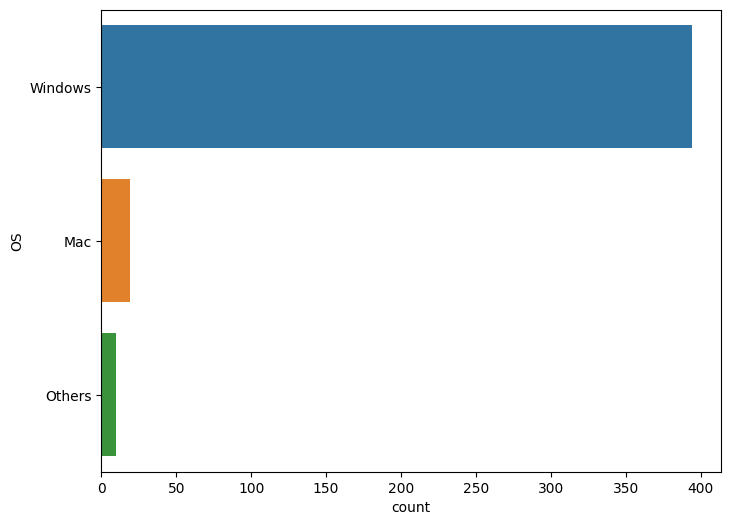

In [175]:
plt.figure(figsize=(8,6))
sns.countplot(y=df['OS'], orient='h')
plt.show()

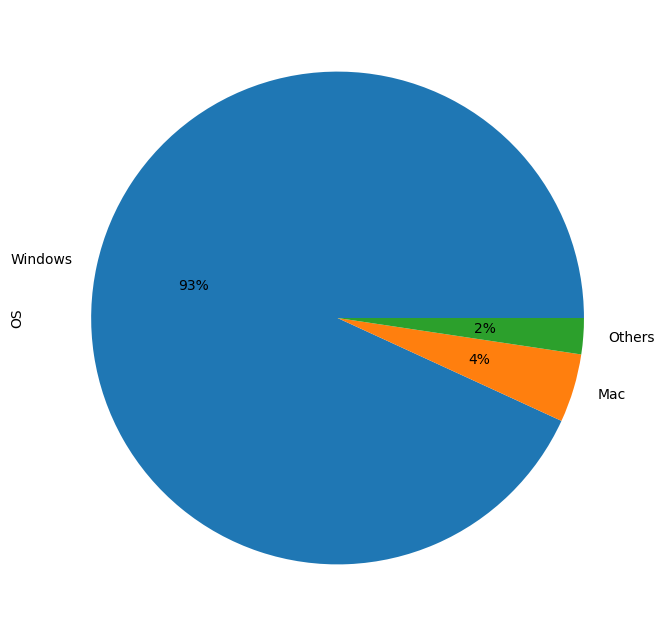

In [176]:
df['OS'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Ram Type**

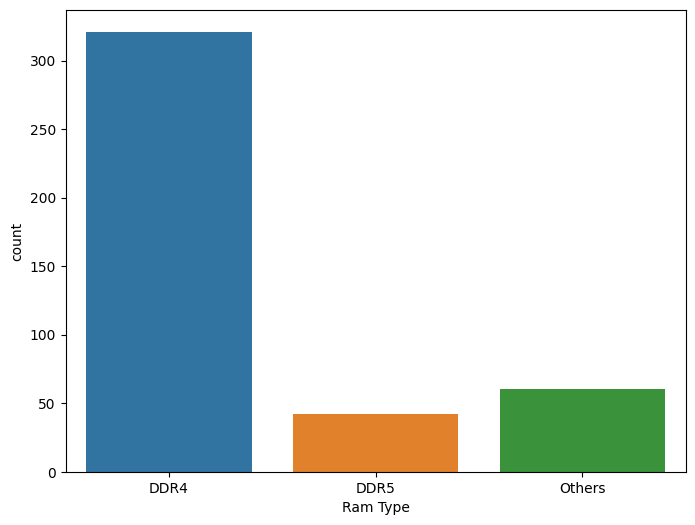

In [177]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Ram Type'])
plt.show()

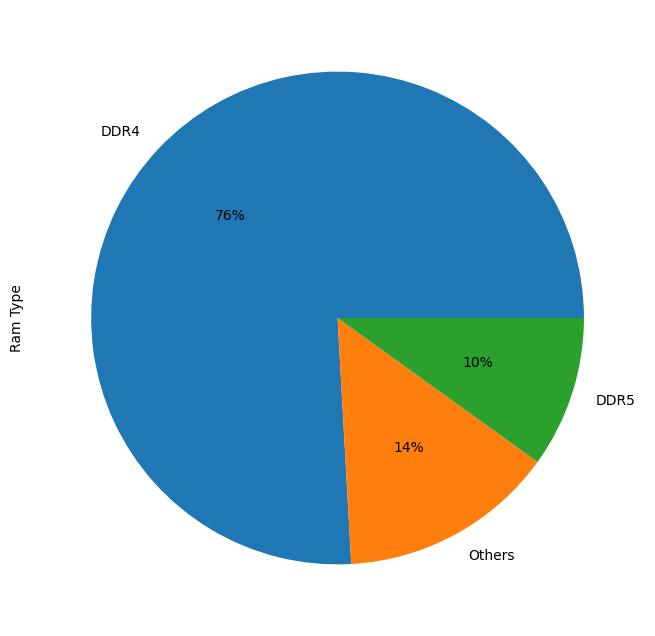

In [178]:
df['Ram Type'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**RAM**

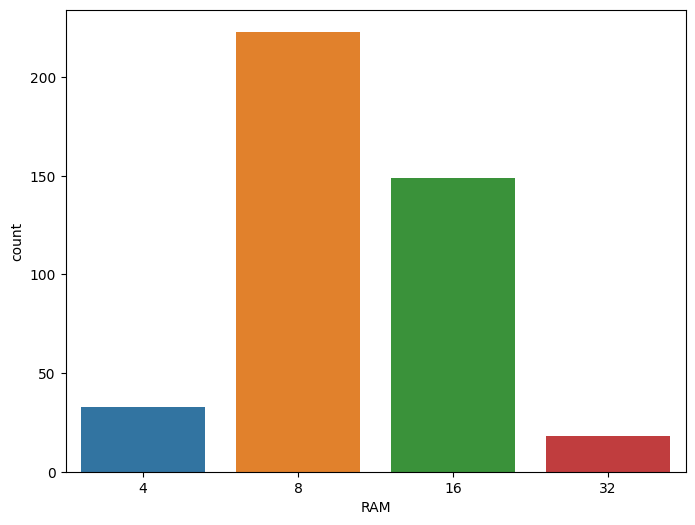

In [179]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['RAM'])
plt.show()

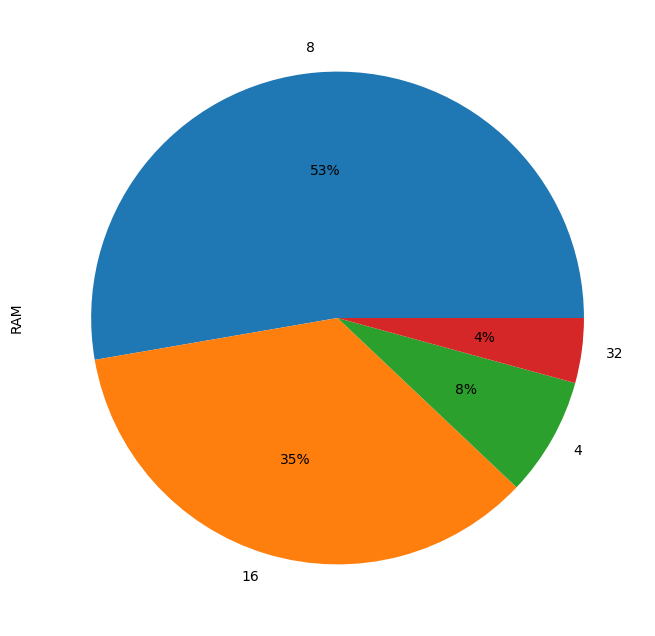

In [180]:
df['RAM'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Processor**

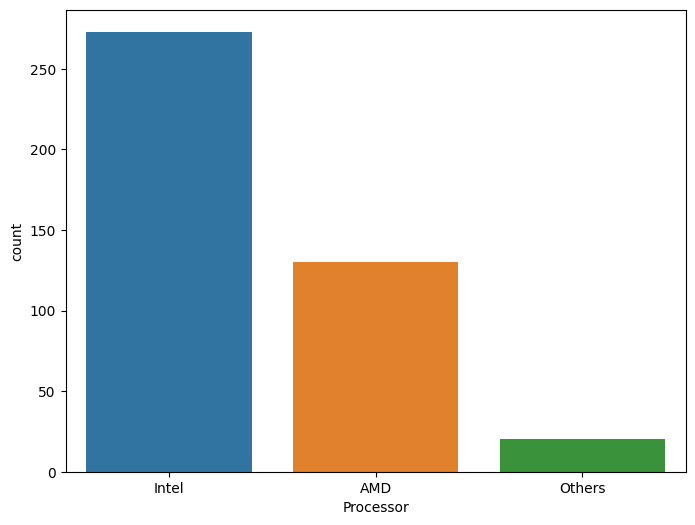

In [181]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Processor'])
plt.show()

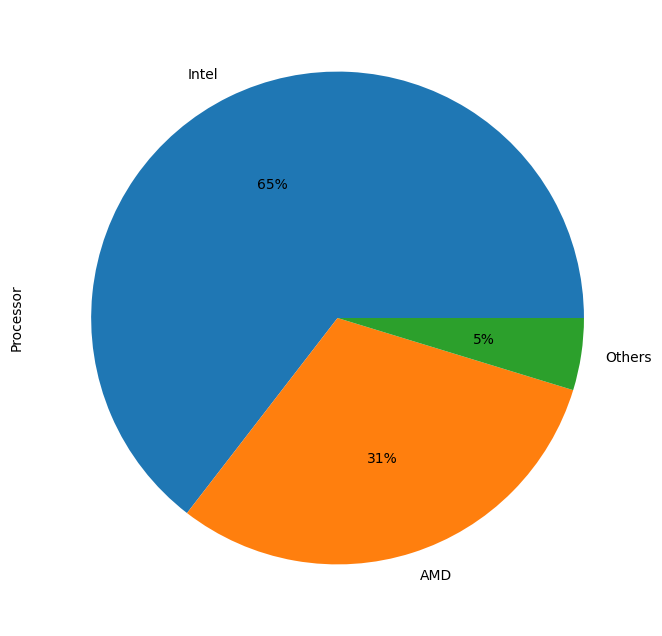

In [182]:
df['Processor'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Graphics Processing Unit (GPU)**

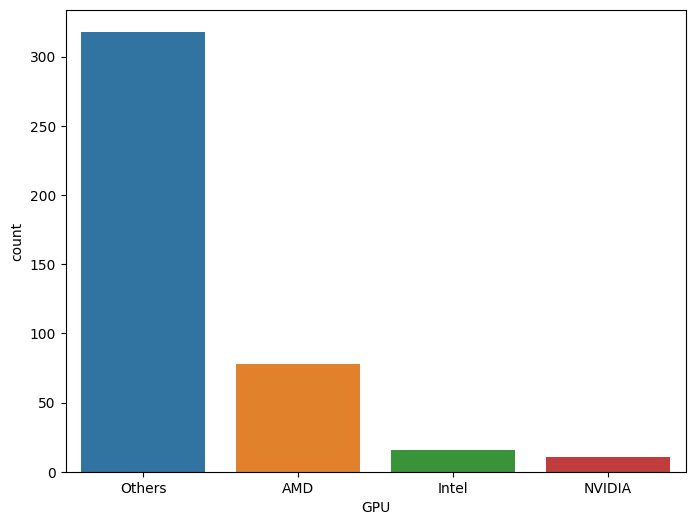

In [183]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['GPU'])
plt.show()

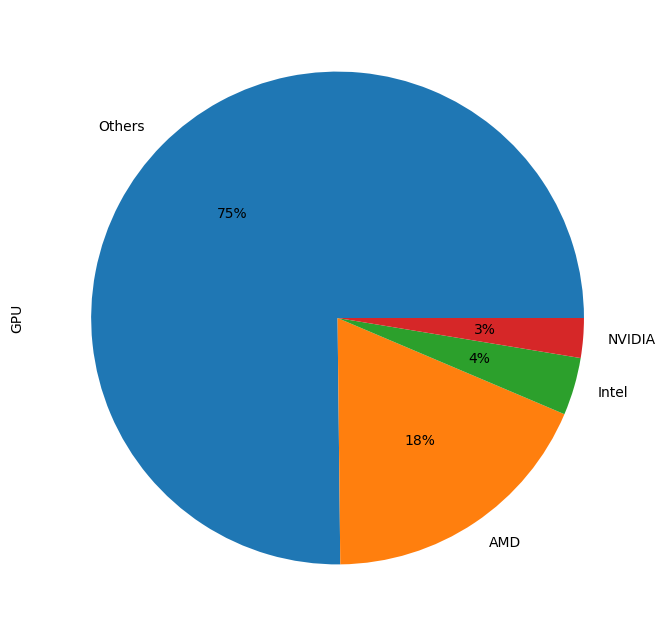

In [184]:
df['GPU'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Warranty**

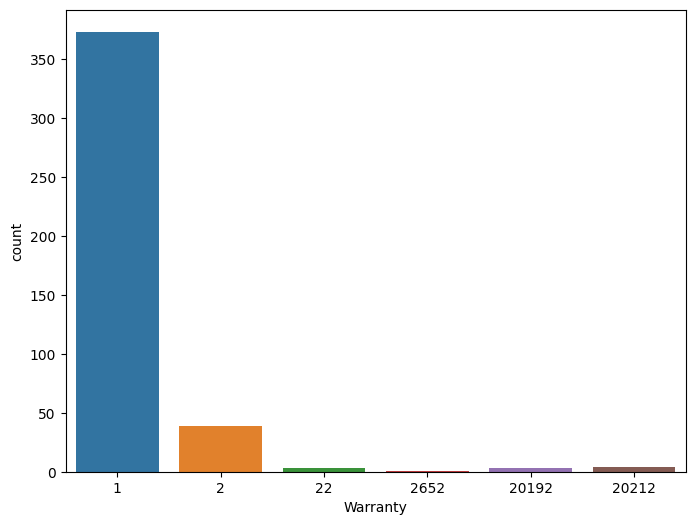

In [185]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Warranty'])
plt.show()

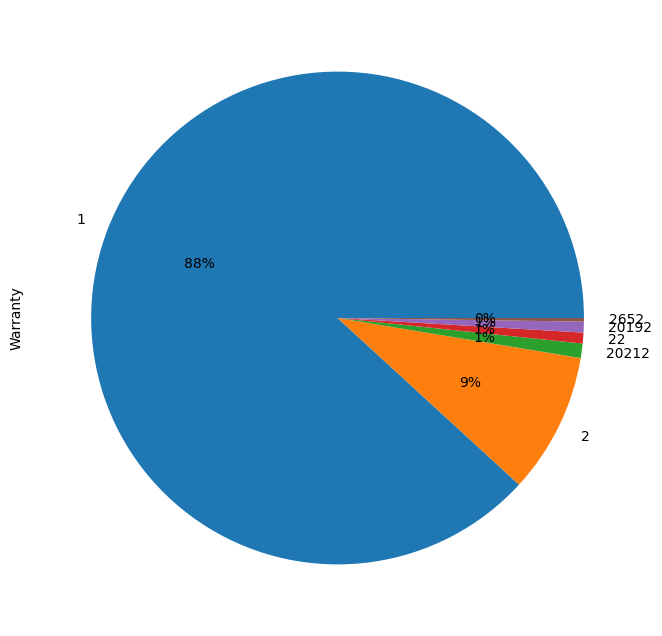

In [186]:
df['Warranty'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Screen Size**

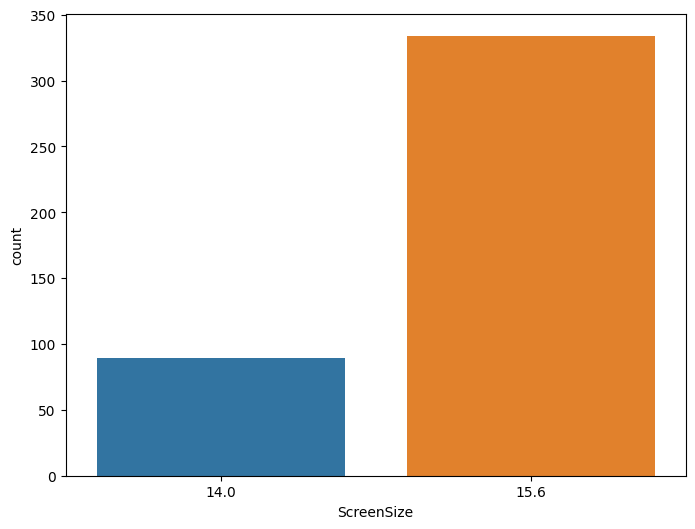

In [187]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['ScreenSize'])
plt.show()

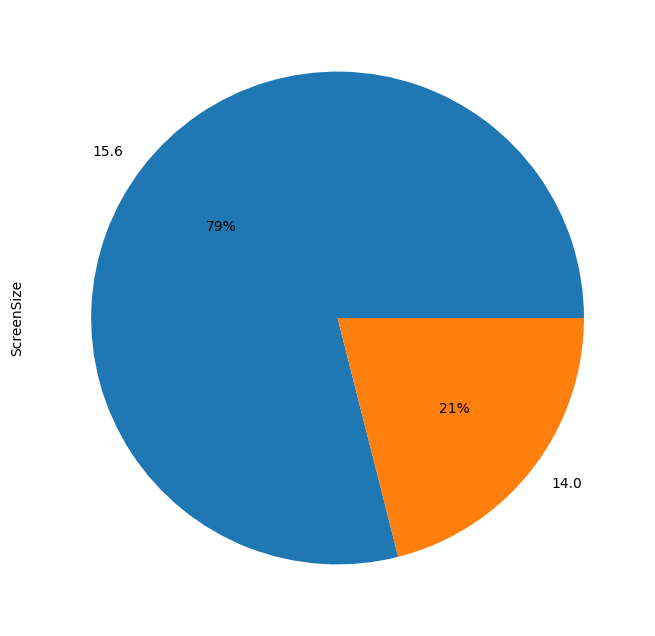

In [188]:
df['ScreenSize'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Disk Type**

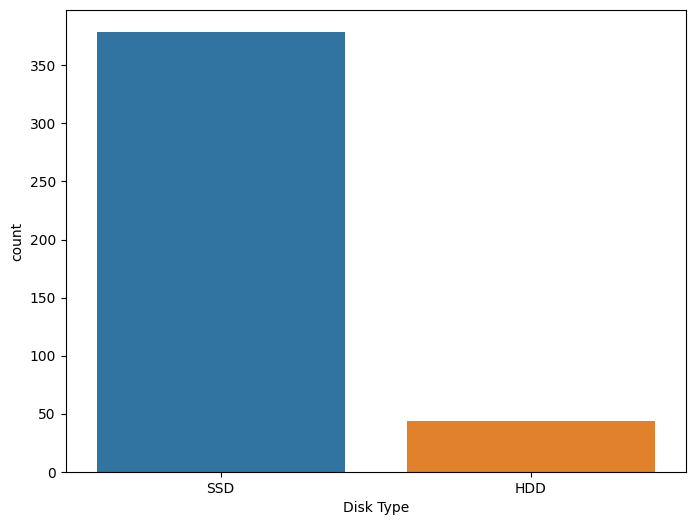

In [189]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Disk Type'])
plt.show()

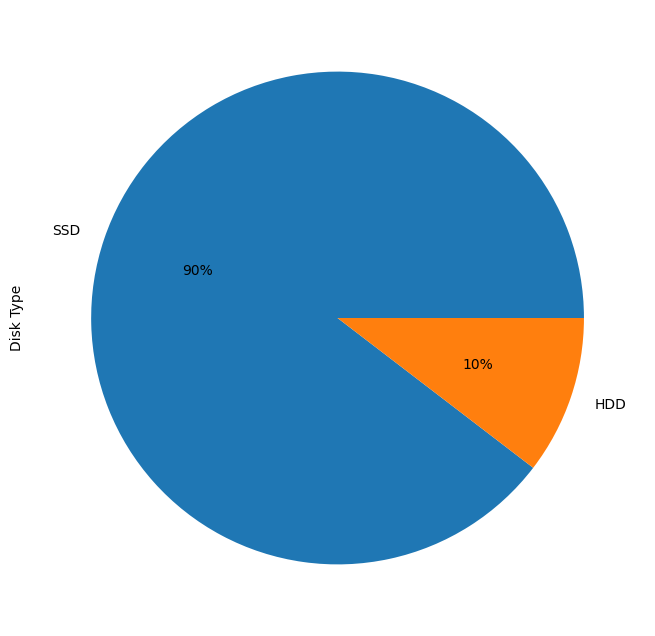

In [190]:
df['Disk Type'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**DISK SIZE**

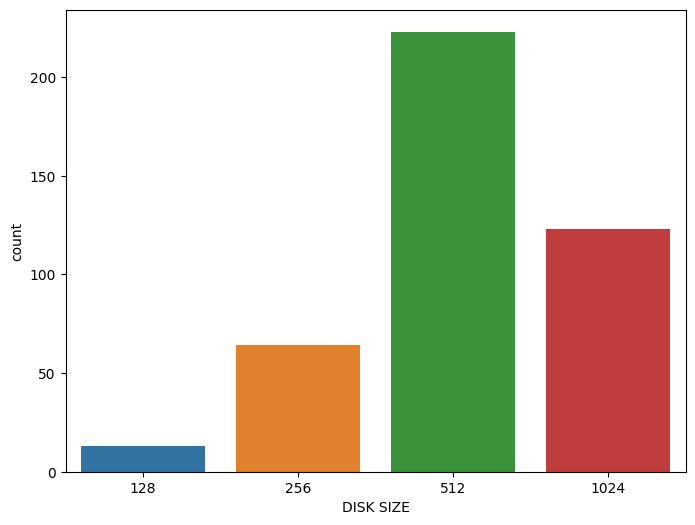

In [191]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['DISK SIZE'])
plt.show()

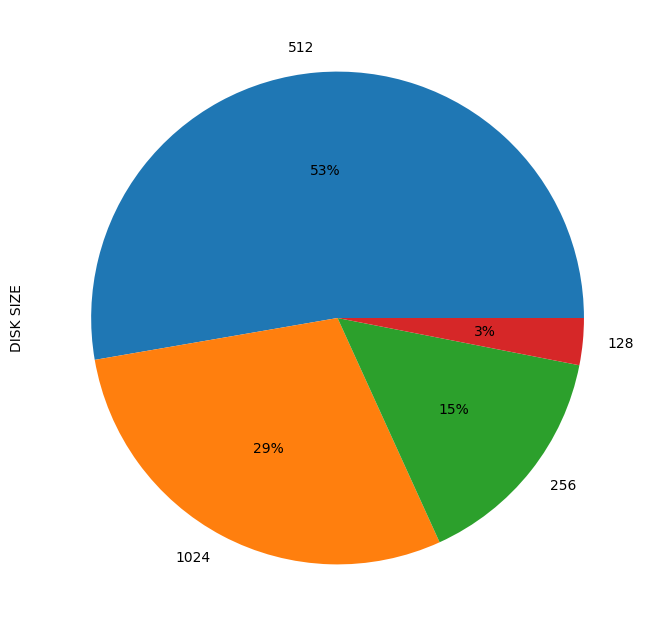

In [192]:
df['DISK SIZE'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Price**

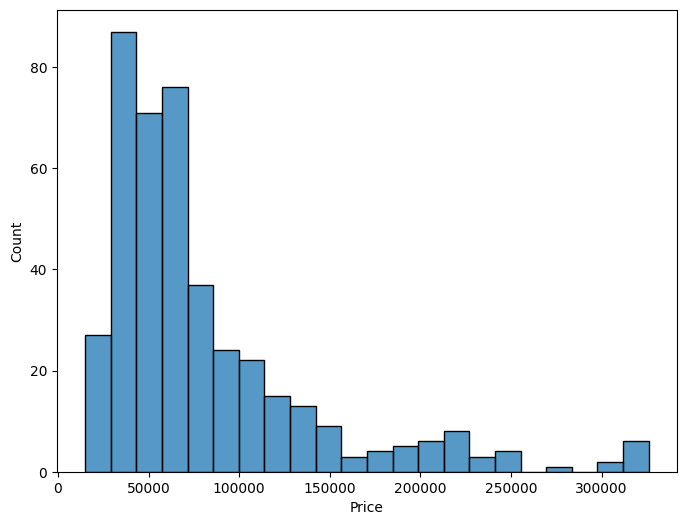

In [193]:
plt.figure(figsize=(8,6))
sns.histplot(x=df['Price'])
plt.show()

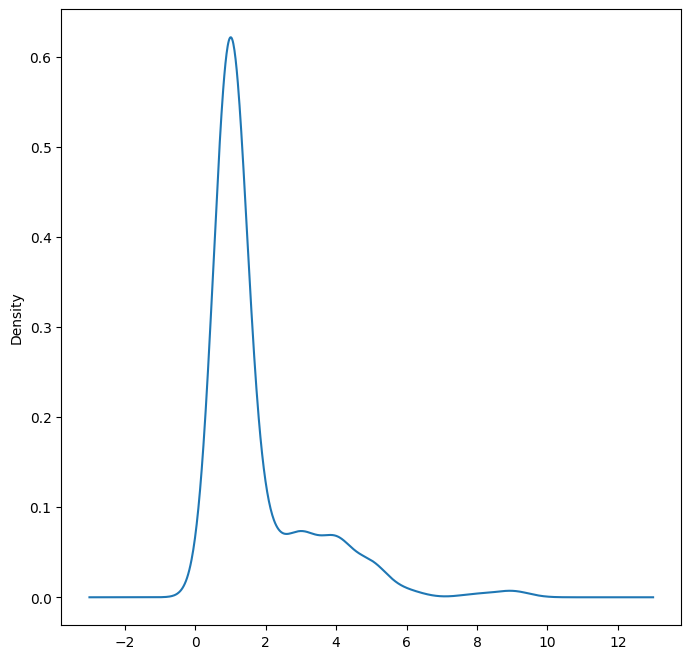

In [194]:
df['Price'].value_counts().plot(kind='kde', figsize=(8,8))
plt.show()

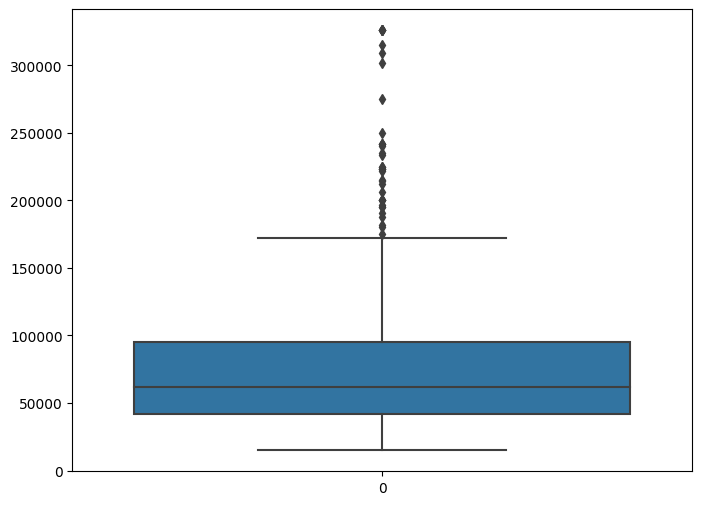

In [195]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Price'])
plt.show()

## Findings


**Brand Name**

- Asus lead the laptop market and the second lead is Lenovo.
- The Market Share of Asus is 35% and lenovo is 37%.
- Dell, HP and Acer are holding 22% of Market share.
- Some Laptop Market share is less because its only target premium gaming market.
- Apple Market share is 3%. Maybe of expensive.


**Operating System (OS)**

- As always windows operating system are leading in the market
- Apple market share is second. and others maybe linux or Andriod OS.
- Windows OS is holding 96% of Market share.
- Apple Market share is 3%. Maybe of expensive.
- Others OS like linux and andriod maybe more are also holding 3% Market Share.


**Ram Type**

- DDR4 Ram is leading the market.
- DDR5 Ram is second lead just because of recently launch or expensive.
- DDR4 Ram is holding 78% of Market share.
- DDR5 Ram also becoming quiet popular and holding market share is 13%.
- Others Ram like DDR4x, DDR5x and LPDDR5 are also holding 8% of Market share.


**RAM**

- 8 GB Ram are leading the market.
- second most popular is 16 GB Ram.
- 56% of Market share holding by 8 GB Ram just because of base variant of laptop come with 8GB of Ram Size.
- 16 Ram Market share is 37% it also quiet popular.
- Some low cost Laptop comes with 4 GB of Ram and Premium Gaming Laptop comes with 32 GB of Ram Size.


**Processor**

- Intel is still leading the Laptop Market.
- Second lead of the Laptop market is AMD.
- Others comes with Snapdragon processor.
- Intel Processor Market share is 54 %.
- AMD Processor Market share is 43%.


**Graphics Processing Unit (GPU)**

- AMD is leading the GPU market 
- NVIDIA is also lead the GPU market
- Others is Top lead of the GPU Market just because its less costly and its Integrated GPUs.
- AMD GPU Market share is 22% just because its less expensive compare to NVIDIA.
- NVIDIA Market share is 2% because its expensiveness.


**Warranty**

- Majorly Laptop Companies provide only 1 year of Warranty.
- Premium Laptop provide 2 years of Warranty.
- Apple Laptop also comes from 2 years Warranty.
- Also if we pay more Laptop Warranty comes with 2 or more years of Warranty.
- 77% of Laptop Market share hold by 1st year Warranty rest others.


**Screen Size**

- 15.6 Inches of Screen Size of Laptop lead the Market.
- 14.0 Inches of Screen Size of Laptop Second lead the Market.
- 83% of Laptop Market share hold by 15.6 Inches Screen size.
- 17% of Laptop Market share hold by 15.6 Inches Screen size.
- Others Screen size like 13.0, 15.0 and 17.0 and etc also Laptops comes.


**Disk Type**

- SSD Disk Type lead the Laptop Market.
- HDD Disk Type is a second lead of Laptop Market.
- 93% of Laptop Market share is hold by SSD Disk type.
- 7% of Laptop Market share is hold by HDD Disk type.
- HDD Disk type is lossing the market because its low speed.


**Disk Size**

- 512 GB of Disk Size is leading the Laptop Market.
- 1024 GB of Disk Size is second lead of the Laptop Market.
- Others like also 256 GB and 128 GB is holding the Laptop Market share.
- 52% of Laptop Market share is hold by 512 GB.
- 32% of Laptop Market share is hold by 1024 GB.


**Price**

- Mid Range of Laptop is holding More Market share.
- Premium Range of Laptop Market share is Less just because of its expensive.

## Bivariate Analysis

Bivariate analysis is a statistical technique used to analyze the relationship between two variables. It involves examining the distribution of each variable and the relationship between the two variables. Common techniques used in bivariate analysis include scatter plots, correlation analysis, t-tests, and chi-squared tests. Bivariate analysis is useful for exploring relationships among variables and is often the first step in statistical analysis.

**Brand Name VS Price**

In [196]:
fig = px.histogram(df, x="Brand Name", y="Price")
fig.show()

- Price depend on Companies premium laptops

**RAM Type VS RAM**

In [197]:
fig = px.histogram(df, x="Ram Type", y="RAM")
fig.show()

- DDR4 RAM Type Lead the Market

**RAM VS Price**

In [198]:
fig = px.box(df, x="RAM", y="Price", points="all")
fig.show()

- RAM Size increase also Price increase.

**Warranty VS Price**

In [199]:
fig = px.violin(df, x="Warranty", y="Price")
fig.show()

- Warranty depends on Laptop Prices

**Disk Type VS Price**

In [200]:
fig = px.box(df, x="Disk Type", y="Price", points="all")
fig.show()

- SSD are more expensive than HDD

**Disk Size VS Price**

In [201]:
fig = px.violin(df, x="DISK SIZE", y="Price")
fig.show()

- RAM Size depends on Laptops Price

**Operating System (OS) VS Price**

In [202]:
fig = px.box(df, x="OS", y="Price", points="all")
fig.show()

- MAC OS Laptops are more expensive than others.

**Screen Size VS Price**

In [203]:
fig = px.violin(df, x="ScreenSize", y="Price", points="all")
fig.show()

- Screen Size depends on Prices

**Graphics Processing Units (GPU) VS Price**

In [204]:
fig = px.violin(df, x="GPU", y="Price", points="all")
fig.show()

- NVIDIA GPUs are Expensive than others

**Processor VS Price**

In [205]:
fig = px.box(df, x="Processor", y="Price")
fig.show()

- Intel Processor are more expensives than others

## Multivariate Analysis

Multivariate analysis is a statistical technique used to analyze data involving multiple variables, which helps researchers to identify relationships, patterns, and trends among the variables. Some common types of multivariate analyses include multiple regression analysis, principal component analysis, factor analysis, cluster analysis, and discriminant analysis. Multivariate analysis is useful in many fields and can provide insights into complex relationships among variables, improving decision-making and identifying important variables.

**RAM VS Price VS Warranty**

In [206]:
fig = px.scatter_3d(df, x="RAM", y="Price", z='Warranty',color='Brand Name')
fig.show()

- Disk Size and Screen size Increase also Laptop Price is Increase

# Model Building

In summary, the steps involved in building a machine learning model include data preparation, splitting the data into training, validation, and test sets, choosing an appropriate model, training the model on the training data, evaluating the model on the validation and test sets, fine-tuning the model based on the evaluation results, and finally deploying the model for making predictions on new data.

In [207]:
df.head()

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE,Price
0,Lenovo,Windows,DDR4,8,Intel,Others,20212,14.0,SSD,256,36990
1,Lenovo,Windows,DDR4,8,Intel,Others,20212,15.6,SSD,512,39991
2,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,32990
3,HP,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512,49990
4,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,49990


In [209]:
X = df.iloc[:,:-1]

In [210]:
X

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE
0,Lenovo,Windows,DDR4,8,Intel,Others,20212,14.0,SSD,256
1,Lenovo,Windows,DDR4,8,Intel,Others,20212,15.6,SSD,512
2,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512
3,HP,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512
4,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512
...,...,...,...,...,...,...,...,...,...,...
713,DELL,Windows,DDR5,16,Intel,Others,1,15.6,SSD,512
714,HP,Windows,DDR4,16,AMD,AMD,1,15.6,SSD,512
715,ASUS,Others,Others,4,Intel,Others,1,14.0,SSD,128
718,ASUS,Windows,Others,16,Intel,Others,1,14.0,SSD,512


In [211]:
y = df.iloc[:,-1]

In [212]:
y

0       36990
1       39991
2       32990
3       49990
4       49990
        ...  
713     76591
714     90000
715     23491
718    125991
719     50990
Name: Price, Length: 423, dtype: int64

In [213]:
y = np.log1p(y)

In [214]:
y

0      10.518430
1      10.596435
2      10.403990
3      10.819598
4      10.819598
         ...    
713    11.246248
714    11.407576
715    10.064415
718    11.743974
719    10.839404
Name: Price, Length: 423, dtype: float64

## Train Test Split

Train-test split is a technique used in machine learning to evaluate the performance of a model on new, unseen data. It involves splitting the available data into two subsets - a training set and a test set. The model is trained on the training set and its performance is evaluated on the test set. This allows the model to learn patterns from the training data and be evaluated on how well it can generalize to new data. The goal of train-test split is to ensure that the model is not overfitting the training data and can perform well on new data. Typically, around 70-80% of the data is used for training, and the remaining 20-30% is used for testing. Cross-validation is another technique that can be used in combination with train-test split to further evaluate the model's performance.

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [216]:
X_train.head()

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE
672,ASUS,Windows,DDR4,8,Intel,Others,1,14.0,HDD,1024
18,MSI,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512
568,ASUS,Windows,DDR5,16,AMD,Others,1,15.6,SSD,1024
332,acer,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512
47,Lenovo,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512


## Linear Regression


Linear regression is a machine learning algorithm used for predicting a continuous outcome variable based on one or more input variables, also called features or predictors. It works by finding the line of best fit that minimizes the distance between the predicted values and the actual values in the training data. This line can then be used to make predictions on new data. Linear regression assumes that the relationship between the input variables and the outcome variable is linear, and it is sensitive to outliers and multicollinearity. It is a popular algorithm in data science and is commonly used in fields such as finance, economics, and social sciences for predicting stock prices, sales, and other continuous outcomes.

In [217]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore',categories='auto'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = LinearRegression()

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    
])

pipe2.fit(X_train,y_train)

y_pred = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8316321946523539
MAE 0.18338194937043067


## Ridge Regression


Ridge Regression is a linear regression technique used to analyze the relationship between a continuous dependent variable and one or more independent variables. It works by adding a penalty term to the least squares equation that minimizes the sum of the squared residuals. The penalty term (also known as L2 regularization) is a function of the coefficients of the regression equation and is proportional to the square of the magnitude of the coefficients. The goal of Ridge Regression is to find the values of the coefficients that minimize the sum of the squared residuals and the penalty term. Ridge Regression is useful when there is multicollinearity between the independent variables, and it can also help to prevent overfitting in cases where the number of independent variables is greater than the number of observations. However, Ridge Regression assumes that the relationship between the dependent variable and the independent variables is linear and can be limited when the number of independent variables is very large.

In [218]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore',categories='auto'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7557012961744282
MAE 0.2122564823460662


## Lasso Regression


Lasso (Least Absolute Shrinkage and Selection Operator) Regression is a linear regression technique used to analyze the relationship between a continuous dependent variable and one or more independent variables. It works by adding a penalty term to the least squares equation that minimizes the sum of the squared residuals. The penalty term (also known as L1 regularization) is a function of the coefficients of the regression equation and is proportional to the absolute value of the coefficients. The goal of Lasso Regression is to find the values of the coefficients that minimize the sum of the squared residuals and the penalty term. Lasso Regression is useful when there is multicollinearity between the independent variables, and it can also help to prevent overfitting in cases where the number of independent variables is greater than the number of observations. Lasso Regression also performs feature selection by setting some coefficients to zero, thereby eliminating the corresponding independent variables from the model. However, Lasso Regression assumes that the relationship between the dependent variable and the independent variables is linear and can be limited when the number of independent variables is very large.

In [219]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore',categories='auto'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8166985662728687
MAE 0.19098326785378608


## Random Forest


Random Forest Regressor is a machine learning algorithm used for predicting a continuous outcome variable based on one or more input variables. It is an ensemble method that combines multiple decision trees to reduce overfitting and improve performance. Random Forest Regressor works by creating a set of decision trees using random subsets of the data and random subsets of the input variables. Each tree in the forest is trained on a different subset of the data and generates a prediction. The final prediction is the average of all the predictions generated by the trees in the forest. Random Forest Regressor is a powerful algorithm that can handle both continuous and categorical variables, can capture nonlinear relationships, and is less sensitive to outliers and overfitting than decision tree regressors. However, it can be computationally expensive and difficult to interpret compared to decision tree regressors.

In [220]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore',categories='auto'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=155,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7987001707532977
MAE 0.18853879721569694


## SVM (Support Vector Machine)


SVM (Support Vector Machine) Regressor is a machine learning algorithm used for predicting a continuous outcome variable based on one or more input variables. It works by finding a hyperplane that separates the data into two classes with the largest margin possible. In the case of regression, the hyperplane is adjusted to fit as many data points as possible within a certain distance from the hyperplane. SVM Regressor is a powerful algorithm that can handle both linear and nonlinear relationships between the input variables and the outcome variable. It is also less sensitive to outliers than linear regression. However, SVM Regressor can be computationally expensive and is sensitive to the choice of the kernel function used to transform the data into a higher-dimensional space. The choice of hyperparameters such as the kernel and regularization parameter can also have a significant impact on the performance of the model.

In [221]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore',categories='auto'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.821849282863477
MAE 0.1842597774561266


## Decision Tree


Decision Tree Regression is a machine learning algorithm used for regression tasks. It works by recursively splitting the data into subsets based on the most important features, and then predicting the average of the target variable for each subset. Decision Tree Regression can handle both linear and nonlinear relationships between the input variables and the outcome variable, and it can also handle missing values and categorical variables. Decision Tree Regression is easy to interpret and visualize, and it can capture complex interactions between the input variables. However, Decision Tree Regression can be prone to overfitting and can be sensitive to the choice of hyperparameters, such as the maximum depth of the tree and the minimum number of samples required to split a node.

In [222]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore',categories='auto'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7555217778059714
MAE 0.19486354714248436


## KNN


K-Nearest Neighbors (KNN) is a machine learning algorithm used for classification and regression tasks. It is a non-parametric and lazy learning algorithm, which means it does not make any assumptions about the underlying distribution of the data and it does not perform any training. Instead, KNN stores all the training data points in memory and predicts the class or value of a new data point based on the K closest training data points in the feature space. The number K is a hyperparameter that determines how many nearest neighbors to consider. KNN can handle both linear and nonlinear relationships between the input variables and the outcome variable, and it can also handle multiclass classification tasks. However, KNN can be sensitive to the choice of distance metric and the number of nearest neighbors, and it can also be computationally expensive for large datasets.

In [223]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore',categories='auto'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6677610879178789
MAE 0.21922364722612078


## Gradient Boost


Gradient Boosting Regression is a machine learning algorithm used for regression tasks. It is an ensemble method that combines multiple weak models into a strong model. Gradient Boosting Regression works by iteratively training decision trees on the data and adjusting the weights of the misclassified data points to focus on the difficult examples. It uses gradient boosting to optimize the model by minimizing a loss function that measures the difference between the predicted values and the actual values. Unlike traditional Gradient Boosting, Gradient Boosting Regression uses a regression loss function instead of a classification loss function. Gradient Boosting Regression is a powerful algorithm that can handle both linear and nonlinear relationships between the input variables and the outcome variable, and it is less prone to overfitting than other algorithms. However, Gradient Boosting Regression can be computationally expensive and requires careful tuning of the hyperparameters to achieve optimal performance.

In [224]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore',categories='auto'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8272412936583783
MAE 0.16970334695803194


# XGBoost


XGBoost (Extreme Gradient Boosting) is a machine learning algorithm used for classification and regression tasks. It is an ensemble method that combines multiple weak models into a strong model. XGBoost works by iteratively training decision trees on the data and adjusting the weights of the misclassified data points to focus on the difficult examples. It uses gradient boosting to optimize the model by minimizing a loss function that measures the difference between the predicted values and the actual values. XGBoost is a powerful algorithm that can handle both linear and nonlinear relationships between the input variables and the outcome variable. It is also less prone to overfitting and can improve the performance of weaker models. XGBoost can handle missing values, has built-in regularization to prevent overfitting, and can handle large datasets. However, XGBoost can be computationally expensive and requires careful tuning of the hyperparameters to achieve optimal performance.

In [225]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore',categories='auto'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.79011534996215
MAE 0.1785643280328564


## AdaBoost


AdaBoost (Adaptive Boosting) is a machine learning algorithm used for classification and regression tasks. It is an ensemble method that combines multiple weak models into a strong model. AdaBoost works by iteratively training weak models on the data and adjusting the weights of the misclassified data points to focus on the difficult examples. The final model is a weighted sum of the weak models, where the weights are determined by the performance of each model. AdaBoost is a powerful algorithm that can handle both linear and nonlinear relationships between the input variables and the outcome variable. It is also less prone to overfitting and can improve the performance of weaker models. However, AdaBoost can be sensitive to noisy data and outliers. It is also computationally expensive and requires careful tuning of the hyperparameters to achieve optimal performance.

In [240]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore',categories='auto'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7291155967665839
MAE 0.22843320533510364


## Lazy Predict

Lazy Predict is a Python library that provides a quick and easy way to evaluate and compare many different machine learning models on a given dataset. It is designed to save time and reduce the complexity of building and evaluating machine learning models by automating the process of model selection and performance evaluation. With Lazy Predict, you can quickly build and evaluate many different models, including regression and classification models, without having to manually specify each model and its hyperparameters. Lazy Predict generates a report that includes the performance metrics for each model, allowing you to quickly compare and select the best-performing model for your problem. It is a useful tool for quickly exploring and prototyping machine learning models, as well as for identifying promising models that can be further tuned and optimized.


from lazypredict.Supervised import LazyRegressor

from sklearn.utils import shuffle

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )

models,predictions = reg.fit(X_train, X_test, y_train, y_test)

## Pickle

Pickle is a Python module used for serializing and deserializing Python objects. It allows you to convert a Python object into a byte stream, which can be saved to a file or transferred over a network. Pickle can handle almost any Python object, including complex data structures like lists, dictionaries, and classes. The serialized object can be stored as a binary file or as a text file using the JSON format. The process of serializing and deserializing Python objects with Pickle is called pickling and unpickling, respectively. Pickle is a powerful tool for saving and loading models in machine learning, as it allows you to save the state of the model and reuse it later without having to retrain the model. However, it is important to note that Pickle can be unsafe if used improperly, as it can execute arbitrary code from the serialized objects.


In the context of machine learning, pickling refers to the process of saving a trained machine learning model to disk so that it can be loaded and reused later without having to retrain the model from scratch. This is particularly useful when dealing with large and complex models that can take a long time to train. The Pickle module in Python is often used for this purpose, as it can serialize most Python objects, including machine learning models. Once the model is pickled, it can be saved as a binary file, and later loaded back into memory using the unpickling process. Pickling machine learning models is a common practice in the industry, as it allows for easy deployment and sharing of models across different systems and platforms. However, it is important to be aware of potential issues with pickling, such as compatibility across different versions of Python, and security risks associated with unpickling untrusted data.

In [241]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe2,open('pipe.pkl','wb'))